<a href="https://colab.research.google.com/github/satendra-p/Bike_Sharing_Demand_Prediction_using_ML_Reggression/blob/main/Bike_Sharing_Demand_Prediction_using_ML_Reggression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

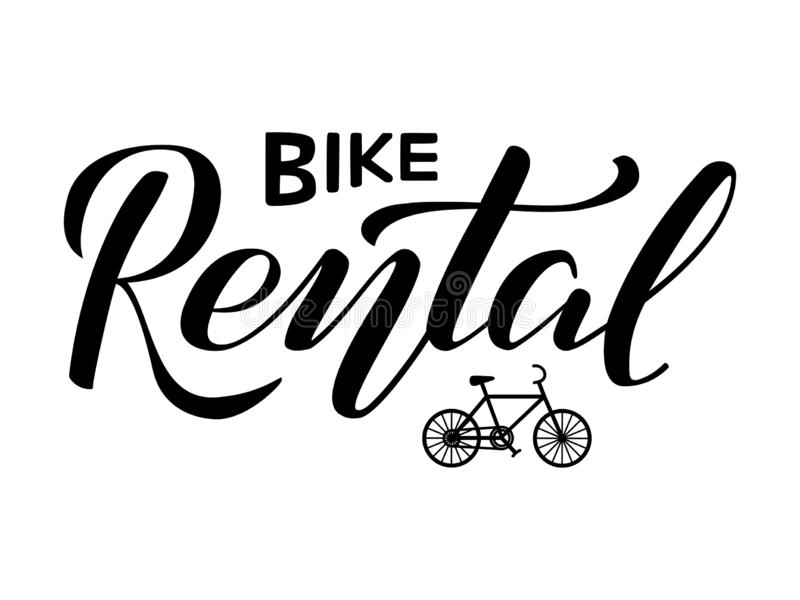

# <b><u> Project Name : Seoul Bike Sharing Demand Prediction </u></b>

---

##### **Project Type**    - Regression
##### **Contribution**    - *Project by Satendra Patel*

# **GitHub Link -**

https://github.com/satendra-p

# **<b> Problem Description </b>**



*Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.*

# **Data Gathering and Discovery**


*In this section we will import our dataset and do some basic operations to see what sort of data that we have and what all attributes are there along with the dependent variable (Rented Bike count).*

# <b> Loading the dataset </b> #

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# For data visualization

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Mounting drive to load data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Reggression_Bike_Sharing/SeoulBikeData.csv',encoding = 'latin')

## Attributes and their Description:- 

*The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.*

***Date*** : year-month-day

***Rented Bike count*** - Count of bikes rented at each hour

***Hour*** - Hour of he day

***Temperature***- Temperature in Celsius

***Humidity*** - %

***Windspeed*** - m/s

***Visibility*** - 10m

***Dew point temperature***- Celsius

***Solar radiation*** - MJ/m2

***Rainfall*** - mm

***Snowfall*** - cm

***Seasons*** - Winter, Spring, Summer, Autumn

***Holiday*** - Holiday/No holiday

***Functional Day*** - NoFunc(Non Functional Hours), Fun(Functional hours)

# <b> Preprocessing the Data </b> 

*Data Cleaning is one of the most integral part of analysis, in order to get something meaningful out of a huge dataset we need to figure out how to extract a generalized, smaller and more skewed sub-dataFrame out of it.*

In [4]:
# Checking the first 5 rows of the dataset

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Checking the last 5 rows of the dataset

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# List of columns of the dataset 

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# Checking the Datatype of the columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Checking the Statistical info 

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [9]:
# Checking the shape of dataset.

df.shape

(8760, 14)

In [10]:
# Checking null values of data.

df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
# Checking duplicates.

df.duplicated().sum()

0

# <b> Exploratary Data Analysis </b>

*Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. it’s a scientific approach to get the story of the data.*

*It focuses more narrowly on checking assumptions required for model fitting and hypothesis testing. It also helps while handling missing values and making transformations of variables as needed.*

In [12]:
# Converting the Date column in Datetime Dtype as it is in object Dtype

df['Date']=pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [13]:
#Seperating Day, Month, Year from DataFrame Column.

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [14]:
# dropping the Date column after extracting necessory information.

df.drop(columns=['Date'],inplace=True)

In [15]:
# Checking the first 5 rows 

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


## <b> Checking Multicollinearity </b>

*Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.*

*A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.*

*Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.*

<Axes: >

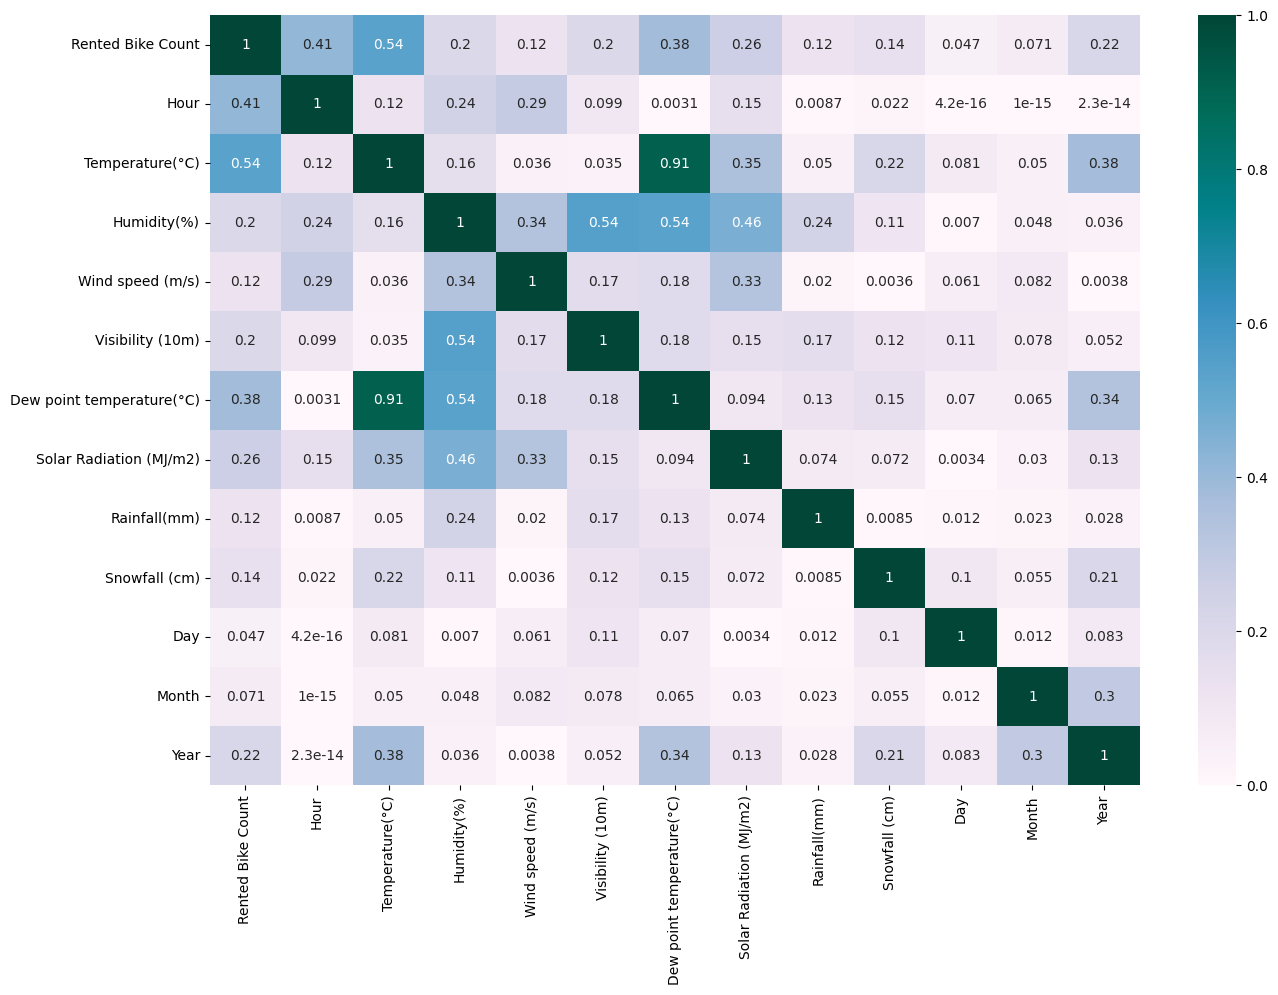

In [16]:
# using correlation graph to check multicollinearity

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

##**VIF Calculation:-**

*VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. In some cases VIF of less than 10 is also acceptable.*

*Here, we have performed the VIF calculations for the clarity about the correlation between the features. after that, we have dropped the features which were highly correlated with any other independent features for accurate predictions.*

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [18]:
#Checking the VIF score of all the independent variables.
cal_VIF(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.456946
1,Temperature(°C),188.757275
2,Humidity(%),187.140788
3,Wind speed (m/s),4.848147
4,Visibility (10m),10.695216
5,Dew point temperature(°C),127.016687
6,Solar Radiation (MJ/m2),2.909493
7,Rainfall(mm),1.103999
8,Snowfall (cm),1.152549
9,Day,4.420676


*As we can see that the Year is highly correlated, we will drop it and then check the correlation again.*

In [19]:
#Checking the correlation of independent variables without the Year column.
cal_VIF(df[[i for i in df.describe().columns if i not in ['Year','Rented Bike Count']]])

,variables,VIF
0,Hour,4.424883
1,Temperature(°C),38.365560
2,Humidity(%),8.326992
3,Wind speed (m/s),4.836834
4,Visibility (10m),9.425316
5,Dew point temperature(°C),19.812251
6,Solar Radiation (MJ/m2),2.905084
7,Rainfall(mm),1.082979
8,Snowfall (cm),1.141184
9,Day,4.346307


*After removing Year, we have observed that there is still a really concerning correlation score on Temperature and Dew point Temperature, since Temperature is an important feature as it is significant for the Seasons Column, We will remove Dew point temperature and check the VIF of remaining variables.*

In [20]:
#Checking VIF score of independent variables without Year, Dew point temperature.
cal_VIF(df[[i for i in df.describe().columns if i not in ['Year','Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.998419
1,Temperature(°C),3.236167
2,Humidity(%),6.757926
3,Wind speed (m/s),4.621365
4,Visibility (10m),5.455330
5,Solar Radiation (MJ/m2),2.280208
6,Rainfall(mm),1.081555
7,Snowfall (cm),1.136671
8,Day,3.849545
9,Month,4.603431


*As a result, the remaining variables after VIF calculations are perfectly fine for our Prediction Models.*

In [21]:
# Dropping the columns with multi-collinearity.

df = df.drop(['Dew point temperature(°C)','Year'],axis=1)

<Axes: >

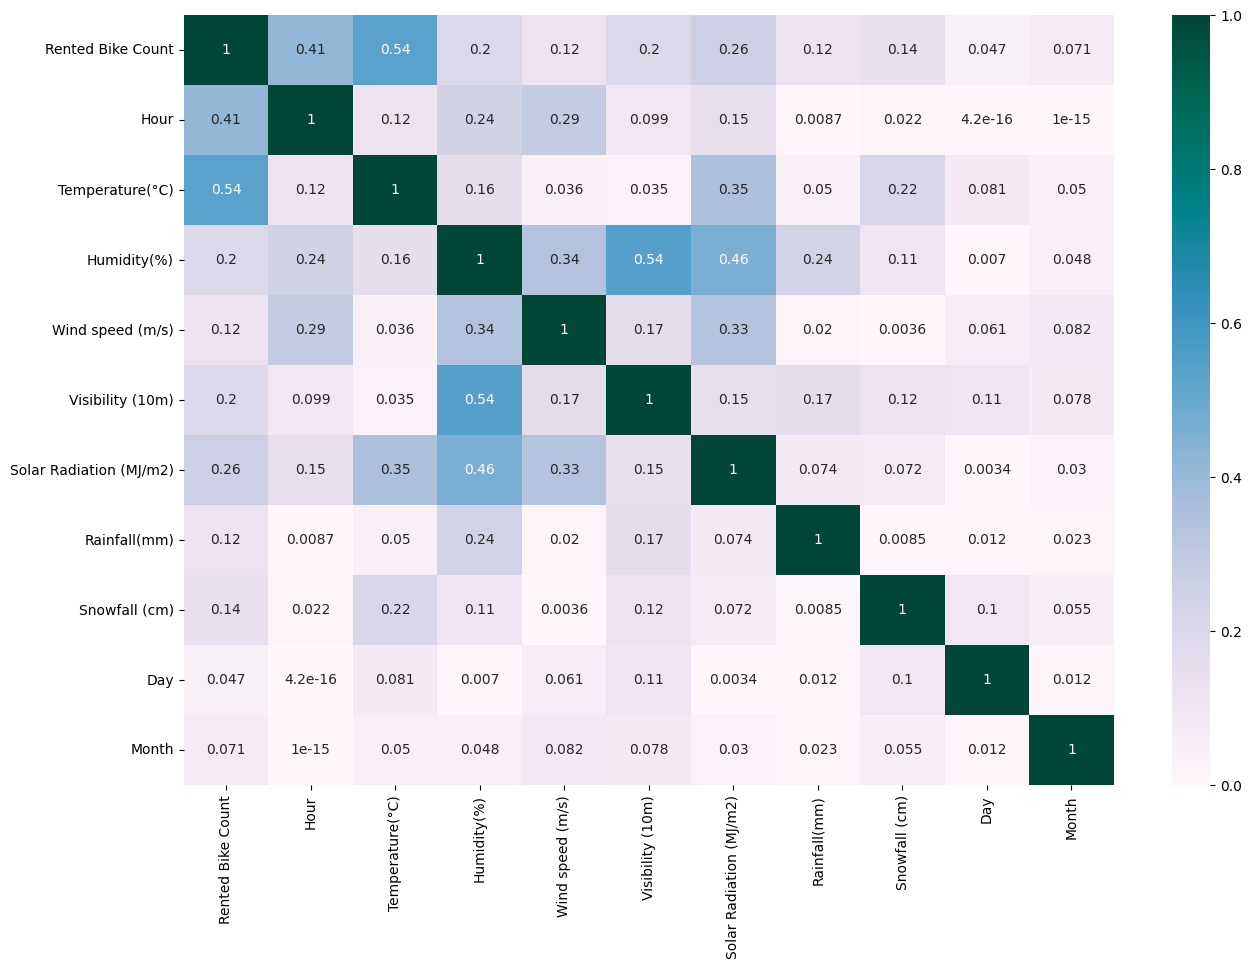

In [22]:
# Checking multicollinearity after defining the new column and removing the previous ones from our dataframe.

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

# **Outlier Detection**

*“Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.” Outliers are extreme values that deviates from the other observations in the dataset.*


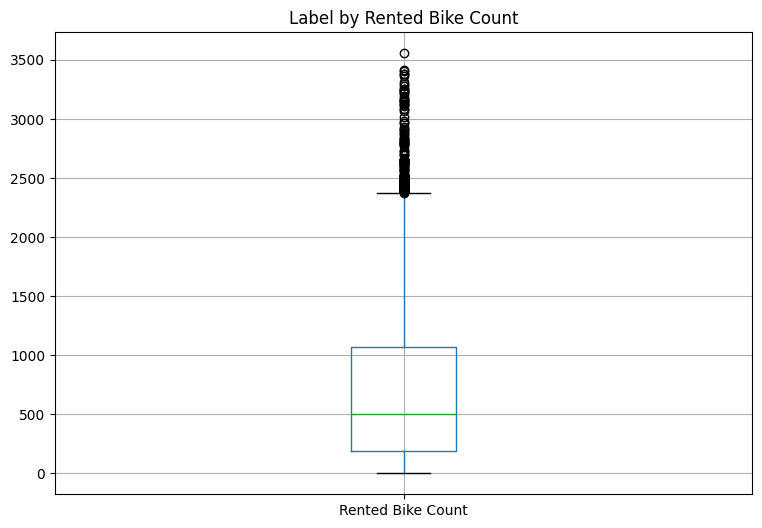

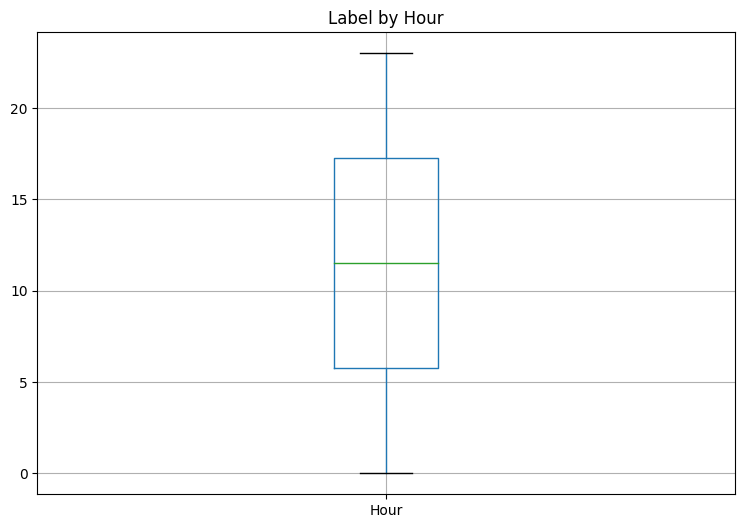

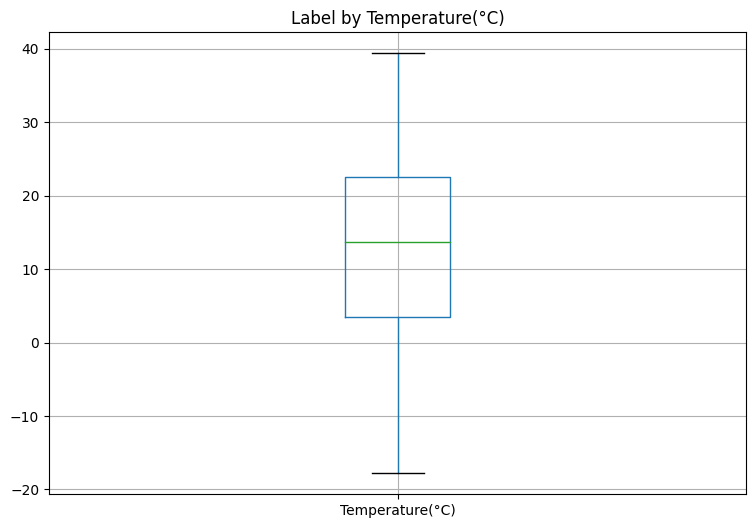

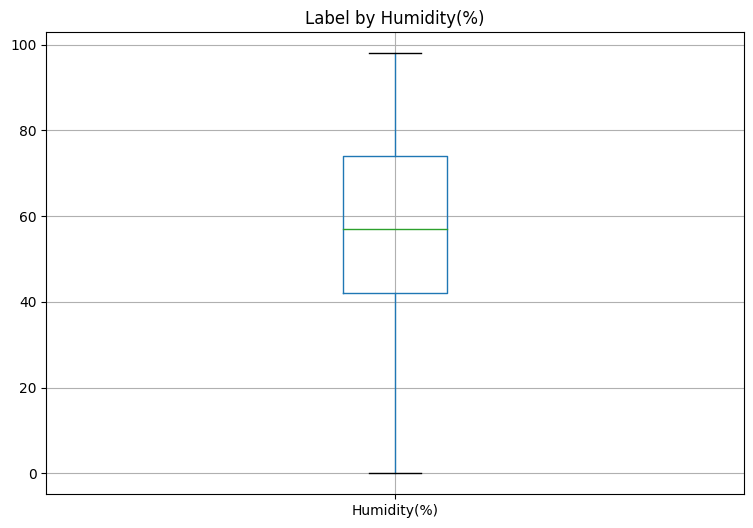

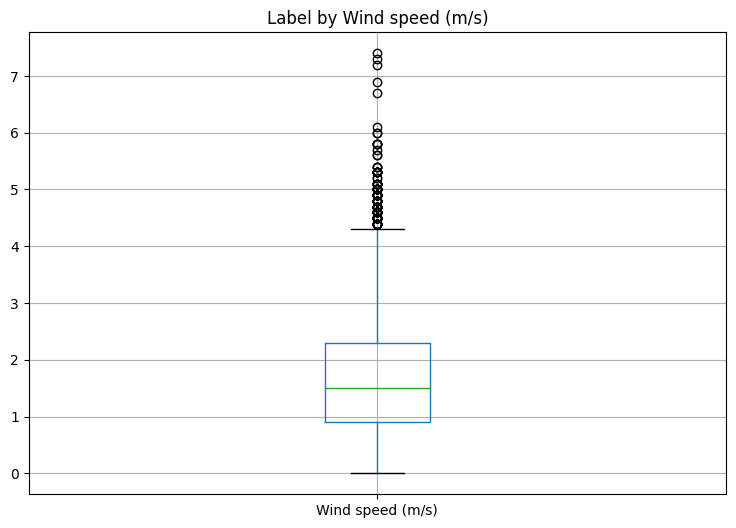

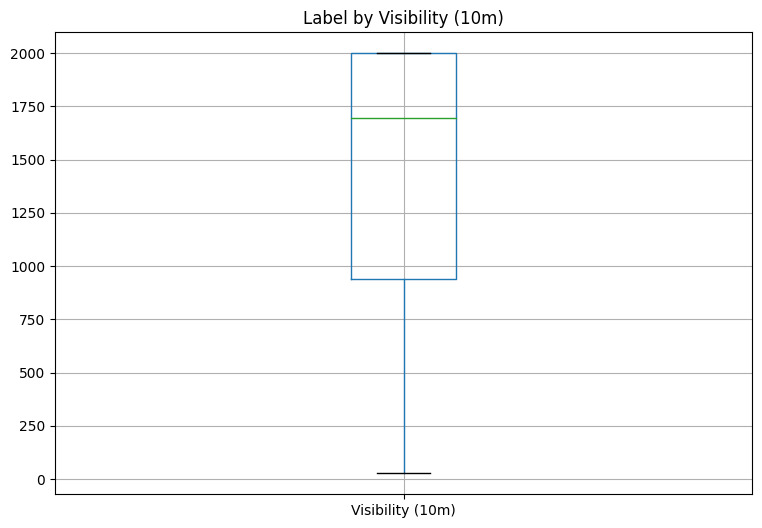

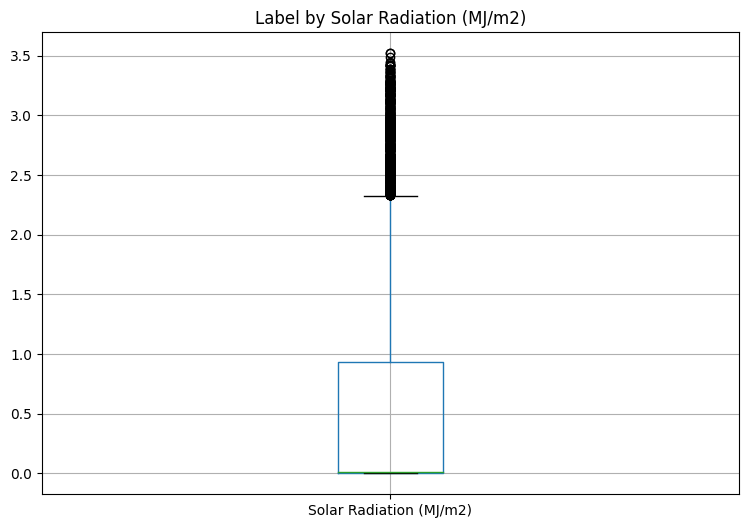

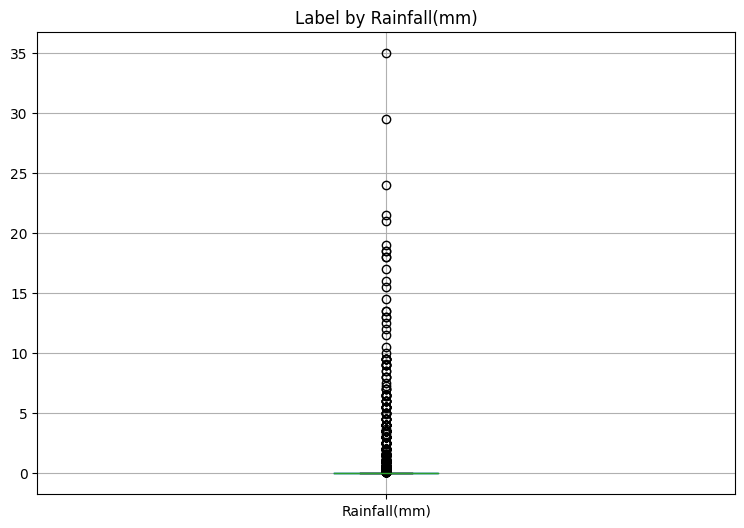

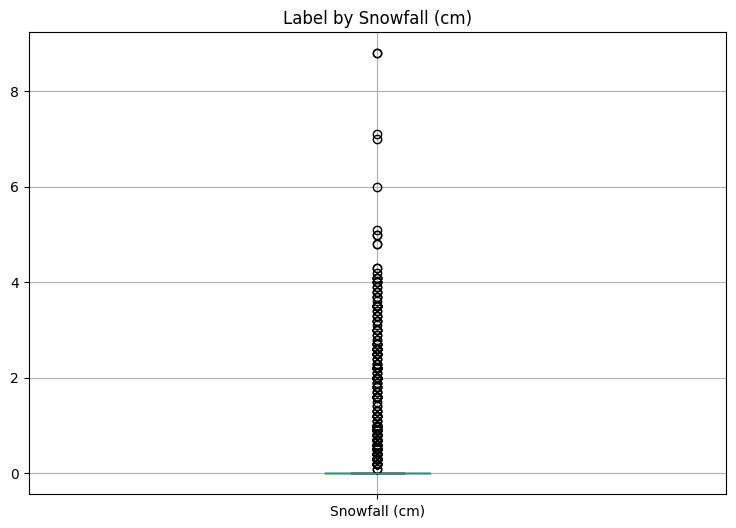

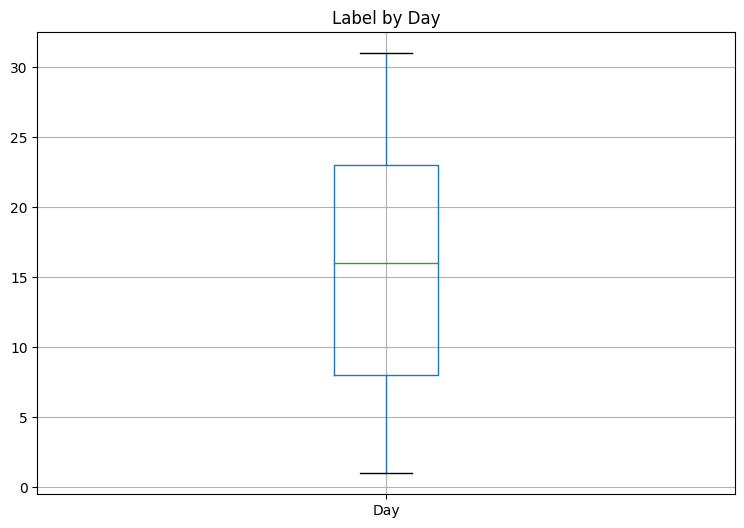

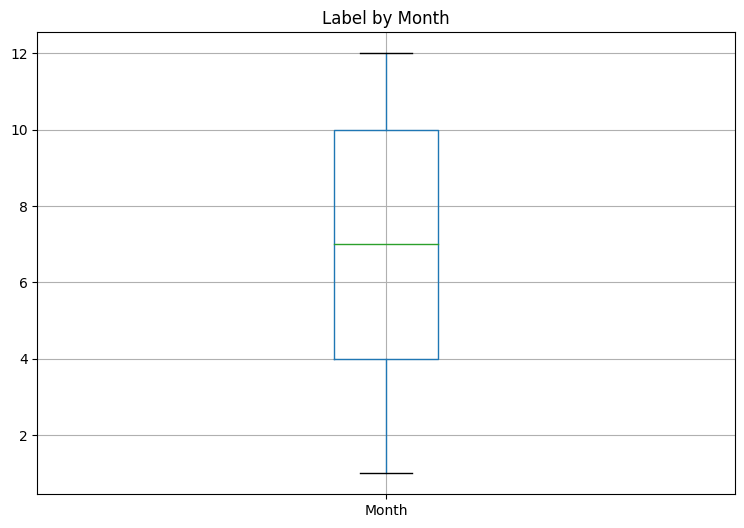

In [23]:
# plot a boxplot for the label by each numerical feature

for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(col)
    ax.set_title('Label by ' + col)
    
plt.show()

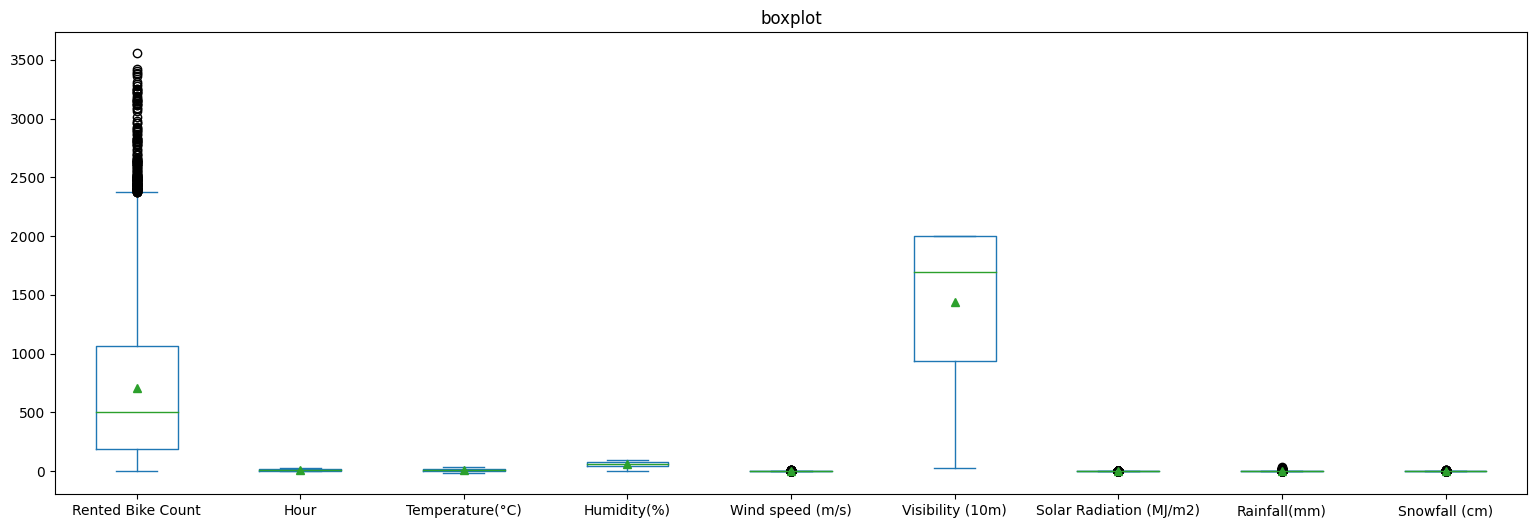

In [24]:
#Plotting the Combined Boxplot.
plt.rcParams['figure.figsize']=(19,6)
ax = df[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 
       'Snowfall (cm)']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

*After plotting the boxplot for the outliers in our dataset, we observed that there are outliers present in "Rented Bike Count" as that is our target variable.*

In [25]:
#Storing Numerical Data in a Variable.
num_data = df.select_dtypes(exclude='object')

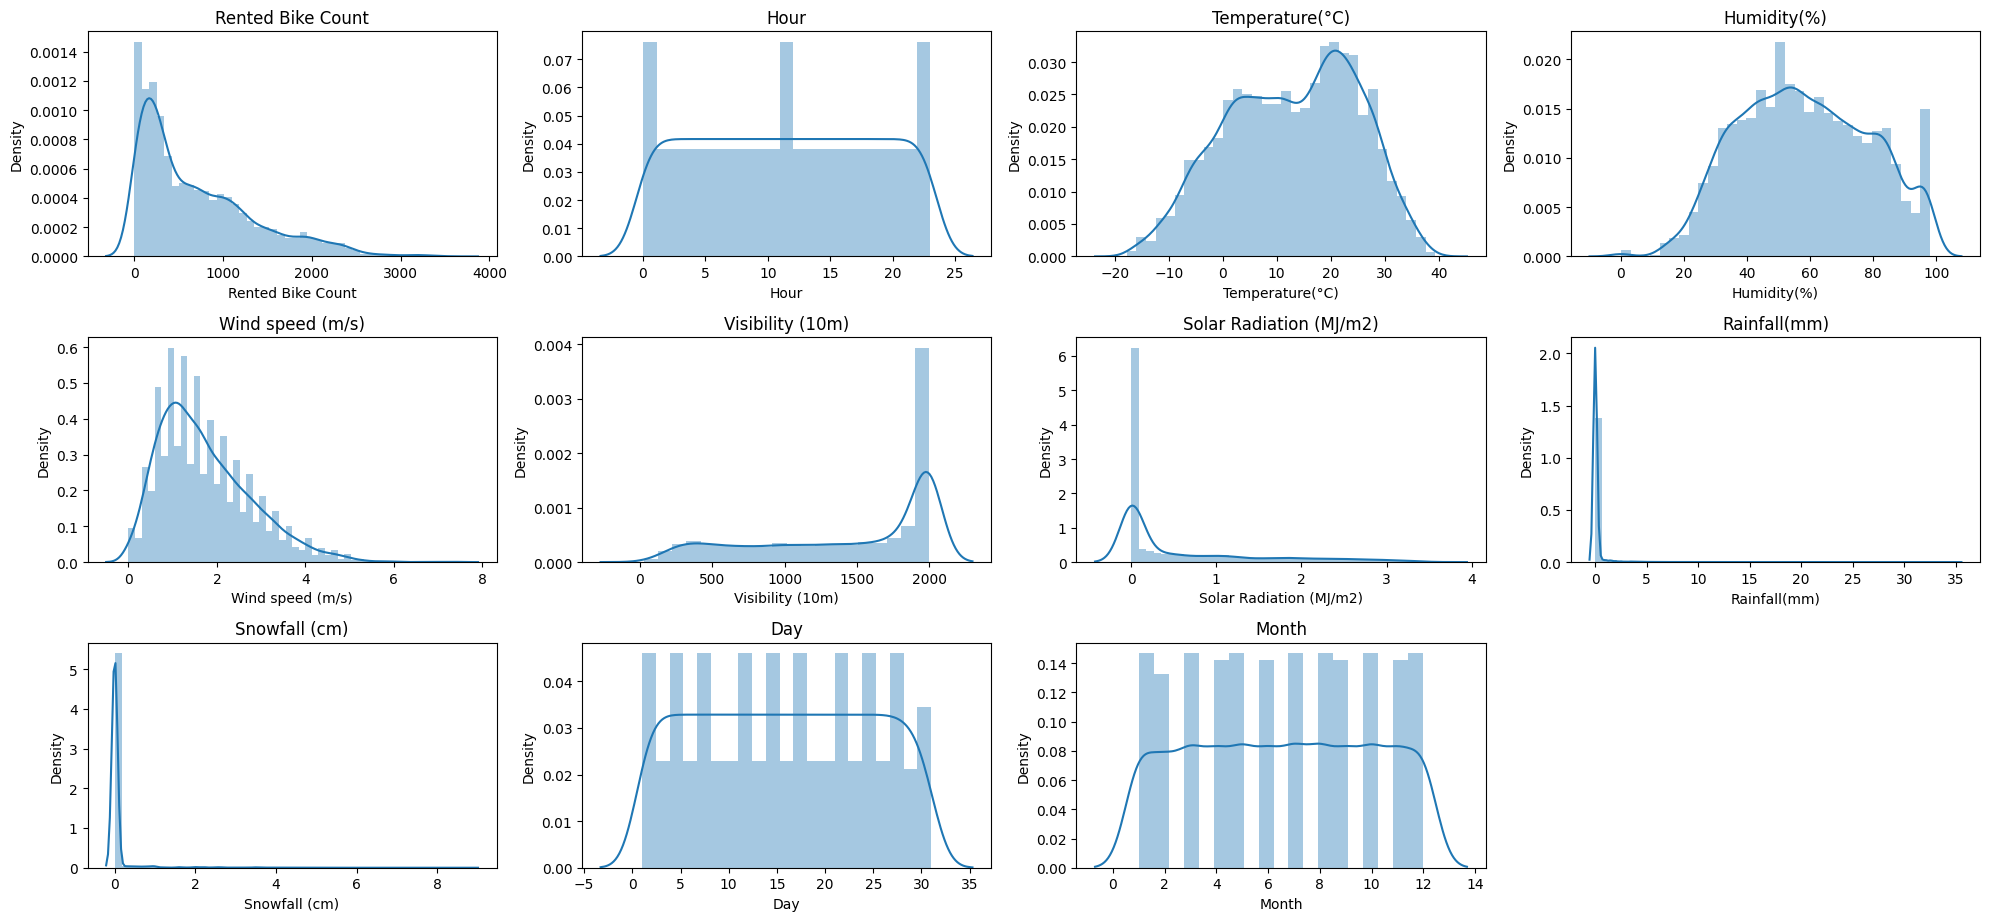

In [26]:
#Plotting distplot to check skewness.
n=1
plt.figure(figsize=(20,15))
for i in num_data.columns:
  plt.subplot(5,4,n)
  n= n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

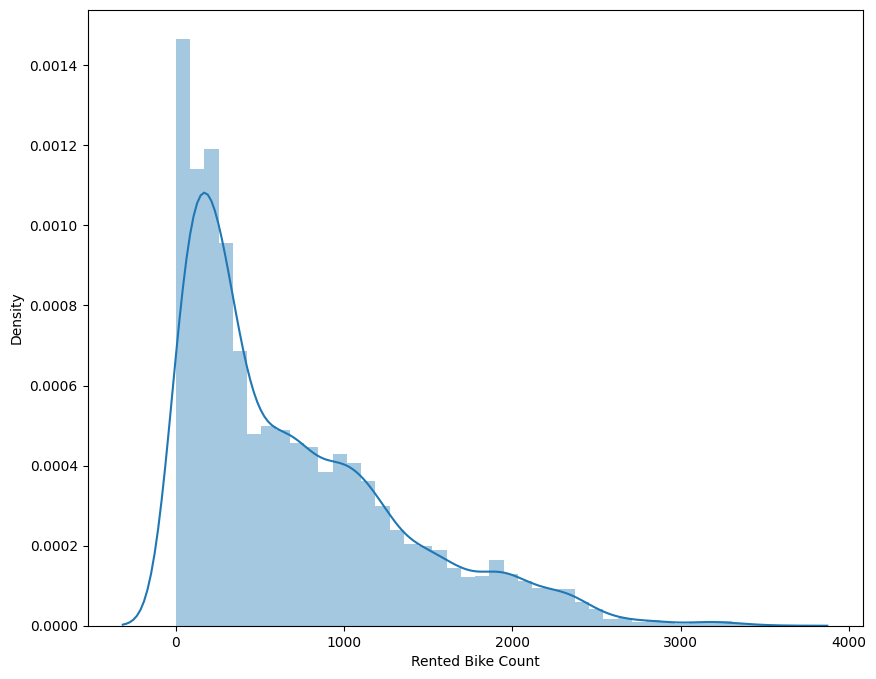

In [27]:
# Checking the skewness of our dependent variable.

plt.figure(figsize=(10,8))
sns.distplot(df['Rented Bike Count'])

*We have plotted distplot to check the skewness of our variables*

***Right skewed columns are :***

*Rented Bike Count (Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),*

***Left skewed columns are :***
 *Visibility (10m)*

 ***Remaining variables are normally distributed.***

Text(0.5, 1.0, 'square')

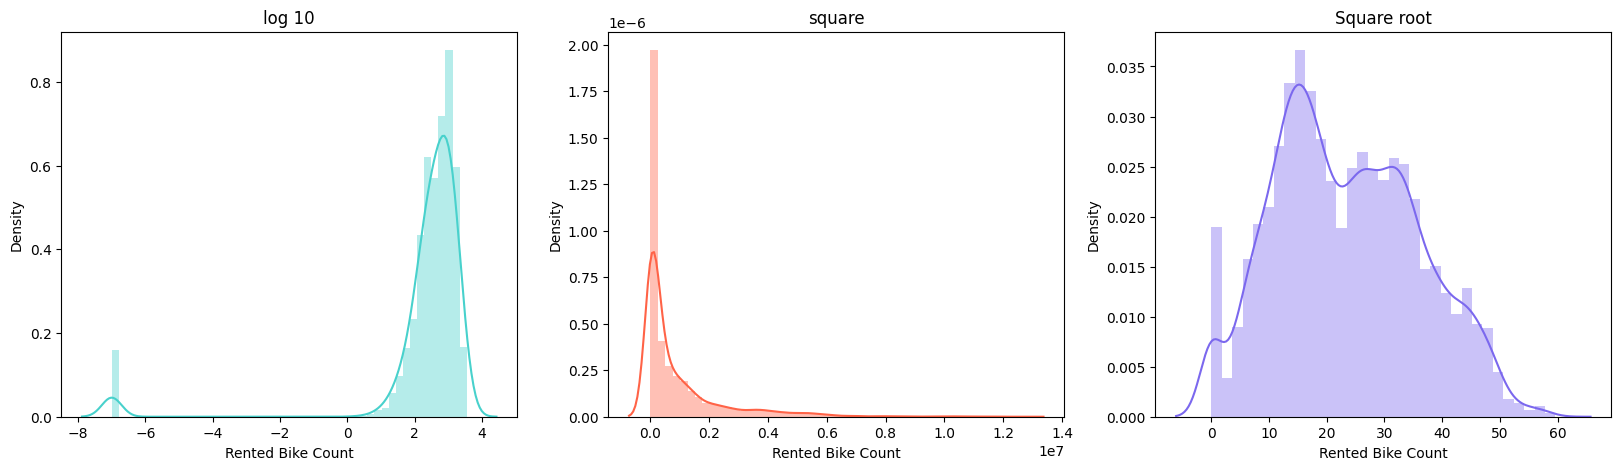

In [28]:
# Checking some tranformations on Dependent variable'Rented Bike Count'
fig,axes = plt.subplots(1,3,figsize=(20,5))

sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='mediumslateblue').set_title("Square root")  #applying Square root transformation
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='mediumturquoise').set_title("log 10") #applying log transformation
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='tomato').set_title("square") #applying Square transformation

*As we can see our dependent variable is right skewed. So we will try some transformations to normalize it.*

*We observed that 'Square Root' tranformation is normalizing the dependent variable so we will use this transformation while we will split our data in Train and Test.*

## <b> Feature Engineering

*All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises. Feature engineering mainly have two goals:*

 ***1.Preparing the proper input dataset, compatible with the machine learning algorithm requirements.***

***2.Improving the performance of machine learning models.***

*We'll try adding and removing some features in this section in order to make a perfect data matrix we can pass to a machine learning model. We will try to interpret categorical features as numeric to be passed to the ML models.*

<Axes: xlabel='Seasons', ylabel='count'>

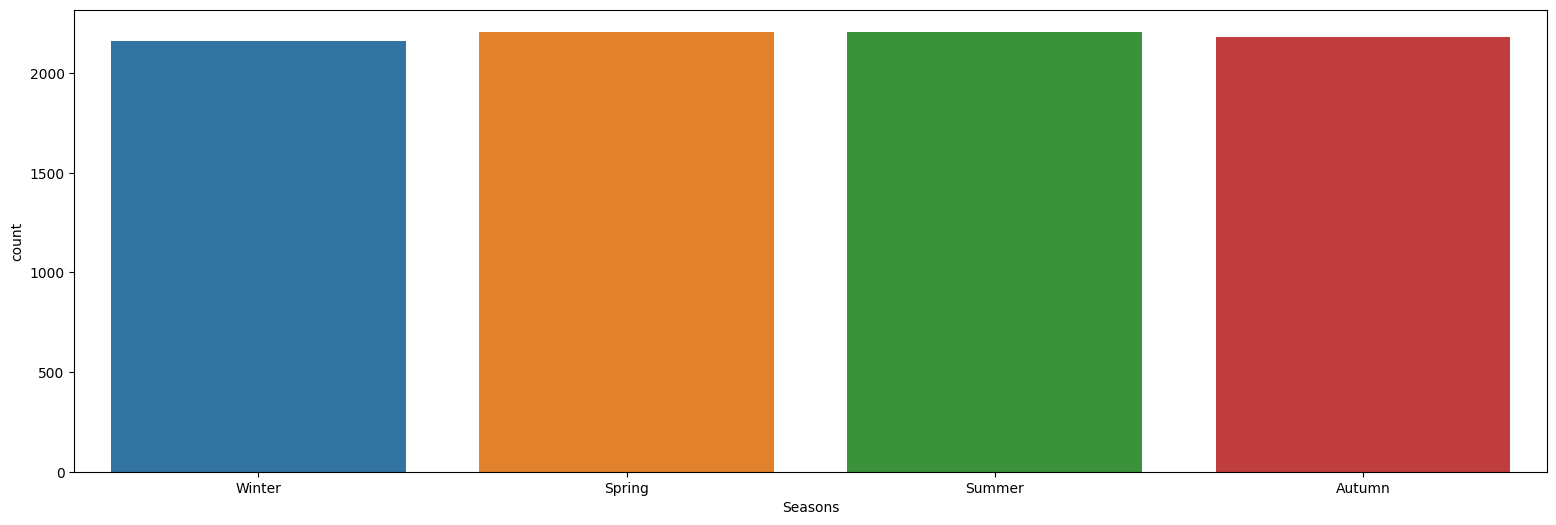

In [29]:
# Checking the value count of the Seasons column.

df.Seasons.value_counts()
sns.countplot(x= df['Seasons'])

<Axes: xlabel='Holiday', ylabel='count'>

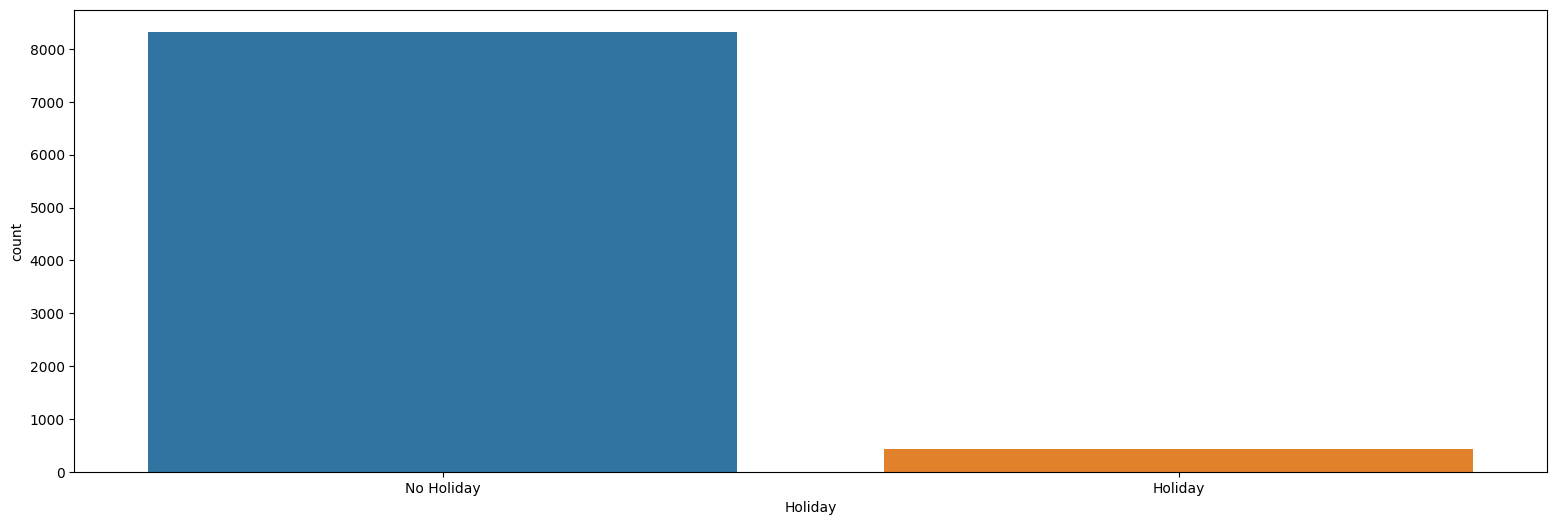

In [30]:
# Checking the value count of the Holiday column.

df.Holiday.value_counts()
sns.countplot(x= df['Holiday'])

<Axes: xlabel='Functioning Day', ylabel='count'>

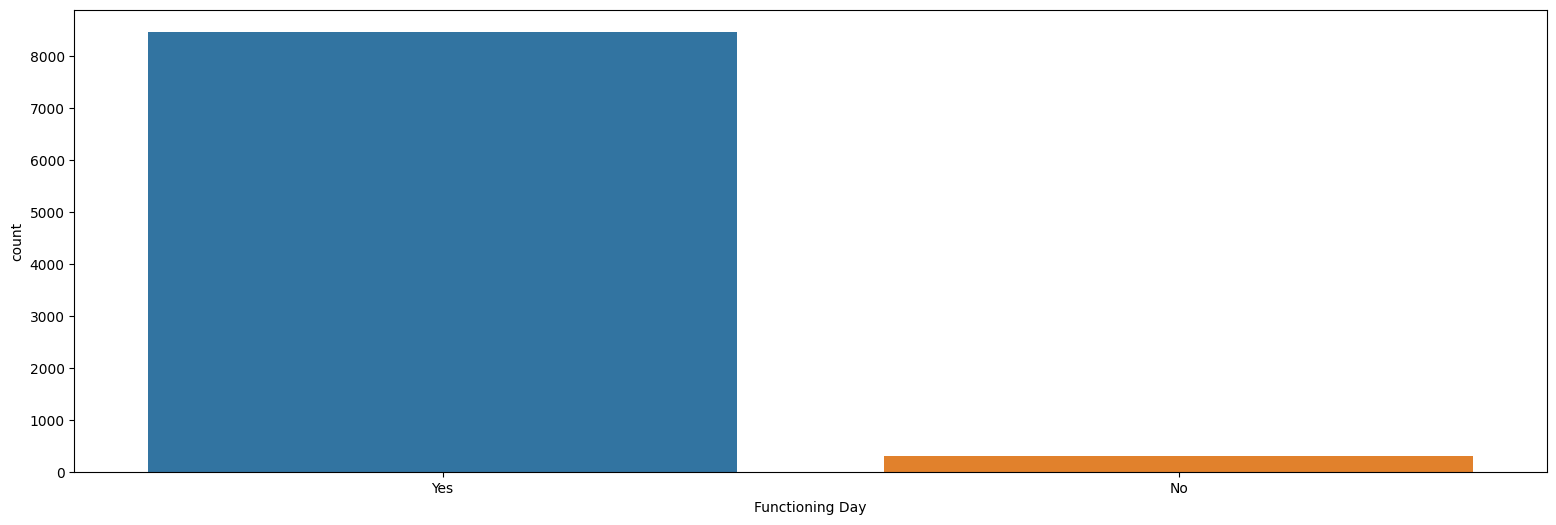

In [31]:
# Checking the value count of the Functioning Day column.

df['Functioning Day'].value_counts()
sns.countplot(x= df['Functioning Day'])

In [32]:
# Converting categorical variable to numeric variable for ease in prediction by using map function.

df['IsHoliday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning_Day']=df['Functioning Day'].map({'Yes':1,'No':0})

In [33]:
#Checking head after conversion.
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,IsHoliday,Functioning_Day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1


In [34]:
# Encoding categorical features
# The categorical features must be encoded to ensure that the models can interpret them. 
# One-hot encoding is used since none of the categorical features are ordinal.

seasons= pd.get_dummies(df.Seasons)
seasons

,Autumn,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8755,1,0,0,0
8756,1,0,0,0
8757,1,0,0,0
8758,1,0,0,0


In [35]:
# Concatenating the dataframe with the dummy dataset of seasons column.
  
df = pd.concat( [df, seasons], axis = 1)

In [36]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,IsHoliday,Functioning_Day,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,0,1,0,0,0,1


In [37]:
# After Conversion of variable to numerical droping the original columns to avoid ambiguity.

df = df.drop(['Functioning Day','Holiday','Seasons'],axis=1)

In [38]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,IsHoliday,Functioning_Day,Autumn,Spring,Summer,Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,0,1,0,0,0,1


In [39]:
# Checking the shape of the updated dataframe.

df.shape

(8760, 17)

*We can also check scatter plots between all features and rented bike count. This will give further better understanding of independent features and their collinearity with target feature.*

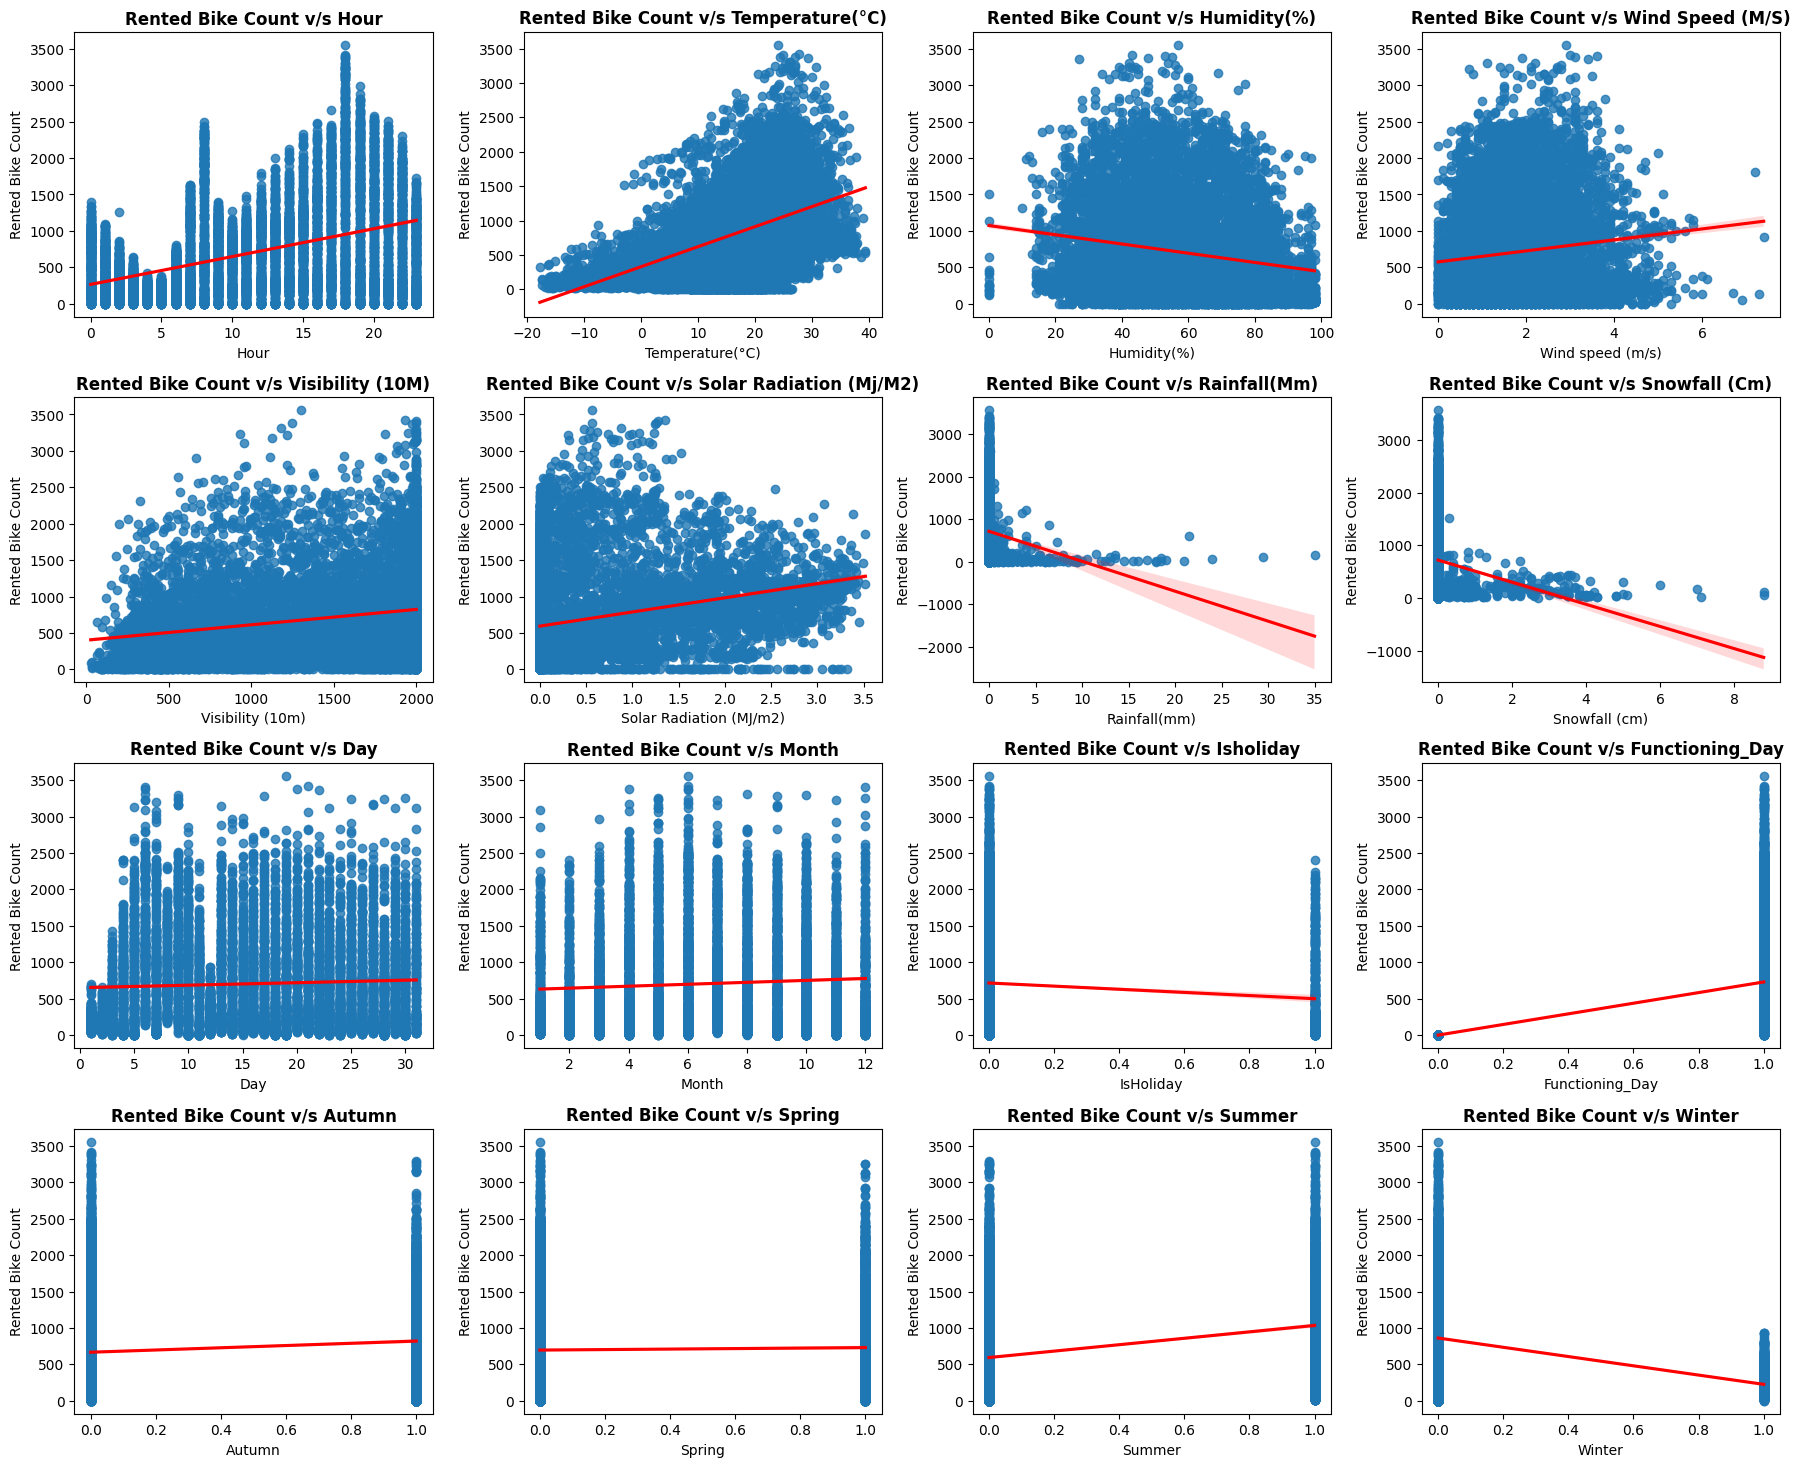

In [40]:
import matplotlib.pyplot as plt

# Creat independent variables
independent_variables = [i for i in df.columns if i not in ['Rented Bike Count']]

# Check linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df, x=column, y='Rented Bike Count', line_kws={"color":"red"})
  plt.title(f'Rented Bike Count v/s {column.title()}', fontweight='bold')
  plt.tight_layout()

*From these subplots we observed that there is a negative linearity in some of the variables which are Humidity(%), Snowfall(cm), Rainfall(mm), Winter.*

## <b> Splitting the data in Train and Test. </b>

*Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets.*

*Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.*

In [41]:
# Importing necessary Libraries.

from sklearn.model_selection import train_test_split

In [42]:
# Data for all the independent variables
X = df.drop('Rented Bike Count',axis=1)

# Data for the dependent variable
y = np.sqrt(df['Rented Bike Count'])

In [43]:
# Dividing the data in training and test dataset.

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [44]:
# cHecking the shape of our train and test data.

print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


In [45]:
# Transforming data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now its time to implement the Machine Learning models and check the accuracy of each model to point out the best one out of all. In this project we are implementing 8 machine learning algorithms to predict the target variable.

## <b> Linear Regression Model </b>

*Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, rather than trying to classify them into categories. There are two main types:*

**Simple regression:**

                    y=mx+b

*Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.*

**Multivariable regression:**

                    f(x,y,z)=w1x+w2y+w3z

*A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.*





In [46]:
#Building the model and fitting training data.
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [47]:
#Checking the coefficients.
regressor.coef_
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
Hour,11.655540
Temperature(°C),27.388372
Humidity(%),-15.333928
Wind speed (m/s),0.790015
Visibility (10m),0.108930
Solar Radiation (MJ/m2),-2.885850
Rainfall(mm),-57.660144
Snowfall (cm),0.617566
Day,-0.107696
Month,1.009546


In [48]:
#Checking the intercept.
regressor.intercept_

-15.605247834880199

In [49]:
#Checking the score.
regressor.score(X_train,y_train)


0.6567692295143683

In [50]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred_test = regressor.predict(X_test)

In [51]:
# Importing important libraries for checking evaluation metrics.

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [52]:
# evaluation metrics for TRAIN data

MSE_lr = mean_squared_error(y_train, y_pred_train)
MAE_lr = mean_absolute_error(y_train, y_pred_train)
RMSE_lr = np.sqrt(MSE_lr)
r2_lr = r2_score(y_train,y_pred_train)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [53]:
# Evaluation of training data set

print(f"The Mean Absolute Error (MAE) is {MAE_lr}.")
print(f"The Mean Squred Error(MSE) is {MSE_lr}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_lr}.")
print(f"The R2 Score is {r2_lr}.")
print(f"Adjusted R2 is {Adjusted_R2_lr}." )


The Mean Absolute Error (MAE) is 5.612400885408921.
The Mean Squred Error(MSE) is 53.29771838664576.
The Root Mean Squared Error(RMSE) is 7.300528637478642.
The R2 Score is 0.6567692295143683.
Adjusted R2 is 0.6536039889796306.


In [54]:
# storing the test set metrics value in the train evaluation dataframe.
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }

In [55]:
#Storing the evaluation metrices in dataframe.
training_df=pd.DataFrame(dict1,index=[1])
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,5.612,53.298,7.301,0.657,0.65


In [56]:
#Predicting for Test data.
y_pred_test = regressor.predict(X_test)

In [57]:
# evaluation metrics for TEST data

MSE_lr = mean_squared_error(y_test,y_pred_test)
MAE_lr = mean_absolute_error(y_test,y_pred_test)
RMSE_lr = np.sqrt(MSE_lr)
r2_lr = r2_score(y_test,y_pred_test)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [58]:
# Evaluation of test data set

print(f"The Mean Absolute Error (MAE) is {MAE_lr}.")
print(f"The Mean Squred Error(MSE) is {MSE_lr}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_lr}.")
print(f"The R2 Score is {r2_lr}.")
print(f"Adjusted R2 is {Adjusted_R2_lr}." )

The Mean Absolute Error (MAE) is 5.692110102592719.
The Mean Squred Error(MSE) is 56.053501216018866.
The Root Mean Squared Error(RMSE) is 7.48688862051646.
The R2 Score is 0.6358189783264685.
Adjusted R2 is 0.6324605366280383.


In [59]:
# storing the test set metrics value in test evaluation dataframe.
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
1,Linear regression,5.692,56.054,7.487,0.636,0.63


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

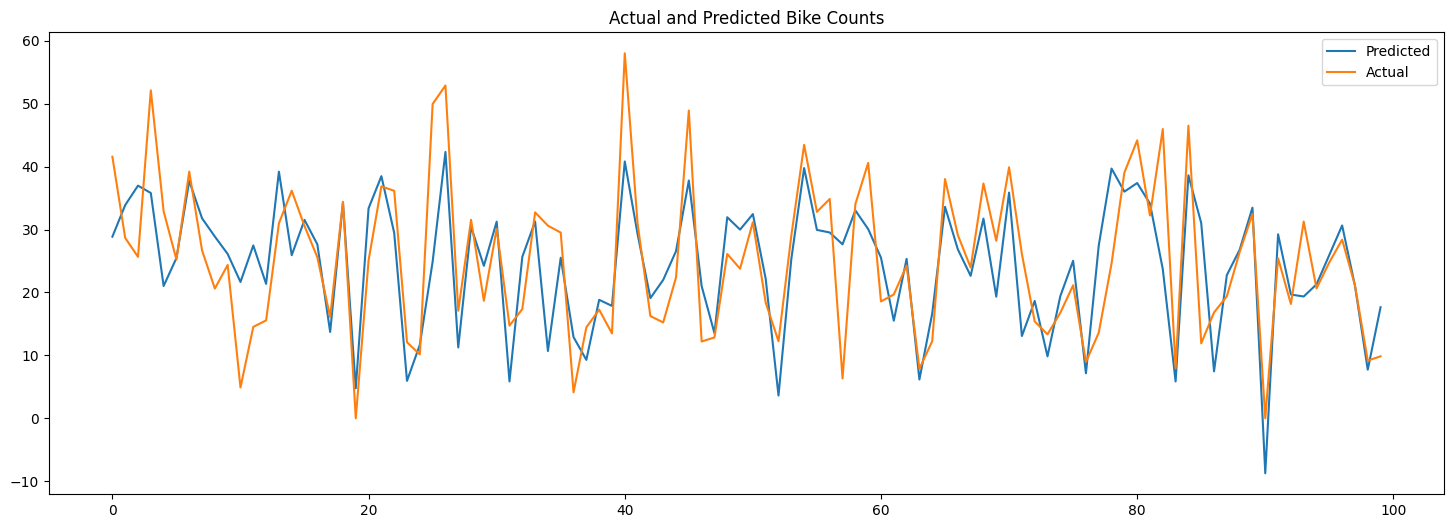

In [60]:
#Plotting the linegraph for actual and predicted bike counts.
plt.figure(figsize=(18,6))
plt.plot((y_pred_test)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

Text(0, 0.5, 'Predicted')

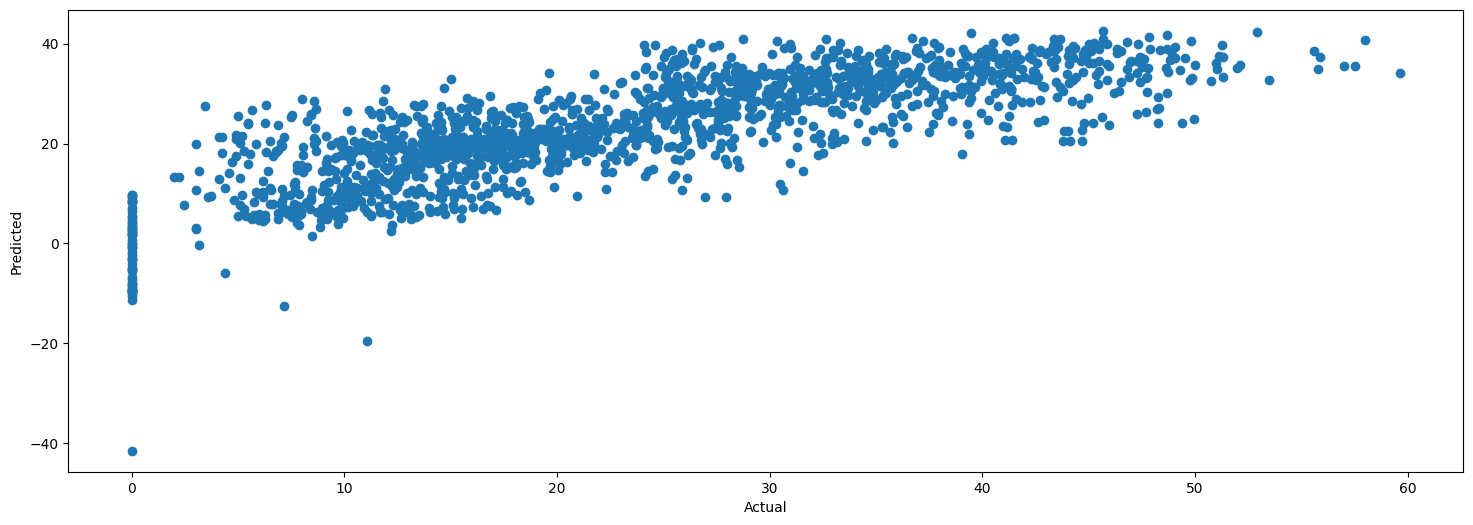

In [61]:
#Plotting the Scatter plot for actual and predicted bike counts.
plt.figure(figsize=(18,6))
plt.scatter((y_test), (y_pred_test))
plt.xlabel('Actual')
plt.ylabel('Predicted')

## <b> Ridge Regressor </b>

*In Ridge regression, we add a penalty term which is equal to the square of the coefficient. The L2 term is equal to the square of the magnitude of the coefficients. We also add a coefficient lambda to control that penalty term. In this case if lambda is zero then the equation is the basic OLS else if lambda > 0 then it will add a constraint to the coefficient. As we increase the value of lambda this constraint causes the value of the coefficient to tend towards zero. This leads to tradeoff of higher bias (dependencies on certain coefficients tend to be 0 and on certain coefficients tend to be very large, making the model less flexible) for lower variance.*

**Limitation of Ridge Regression:** 

*Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.*

In [62]:
#Creating the model object.
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [63]:
#Fitting the model.
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [64]:
#Checking the score.
ridge.score(X_train, y_train)

0.6567642761388803

In [65]:
# predict for train data
y_pred_train_ridge=ridge.predict(X_train)

# predict for test data
y_pred_test_ridge=ridge.predict(X_test)

In [66]:
#Calculate evaluation metrices for Train data
MSE_ridge  = mean_squared_error(y_train, y_pred_train_ridge)
MAE_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
r2_ridge = r2_score(y_train, y_pred_train_ridge)
Adjusted_R2_ridge=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [67]:
print(f"The Mean Absolute Error (MAE) is {MAE_ridge}.")
print(f"The Mean Squred Error(MSE) is {MSE_ridge}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_ridge}.")
print(f"The R2 Score is {r2_ridge}.")
print(f"Adjusted R2 is {Adjusted_R2_ridge}." )

The Mean Absolute Error (MAE) is 5.613435159844023.
The Mean Squred Error(MSE) is 53.29848755897681.
The Root Mean Squared Error(RMSE) is 7.300581316510132.
The R2 Score is 0.6567642761388803.
Adjusted R2 is 0.6535989899245991.


In [68]:
# storing the train set metrics value in the train evaluation dataframe 
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_ridge),3),
       'MSE':round((MSE_ridge),3),
       'RMSE':round((RMSE_ridge),3),
       'R2_score':round((r2_ridge),3),
       'Adjusted R2':round((Adjusted_R2_ridge ),2)}
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.612,53.298,7.301,0.657,0.65
1,Ridge regression,5.613,53.298,7.301,0.657,0.65


In [69]:
# Evaluation Metrices for test data

MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
RMSE_r=np.sqrt(MSE_r)
r2_r= r2_score((y_test), (y_pred_test_ridge))
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


In [70]:
# storing the test set metrics value in the test evaluation dataframe
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.692,56.054,7.487,0.636,0.63
1,Ridge regression,5.692,56.024,7.485,0.636,0.63


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

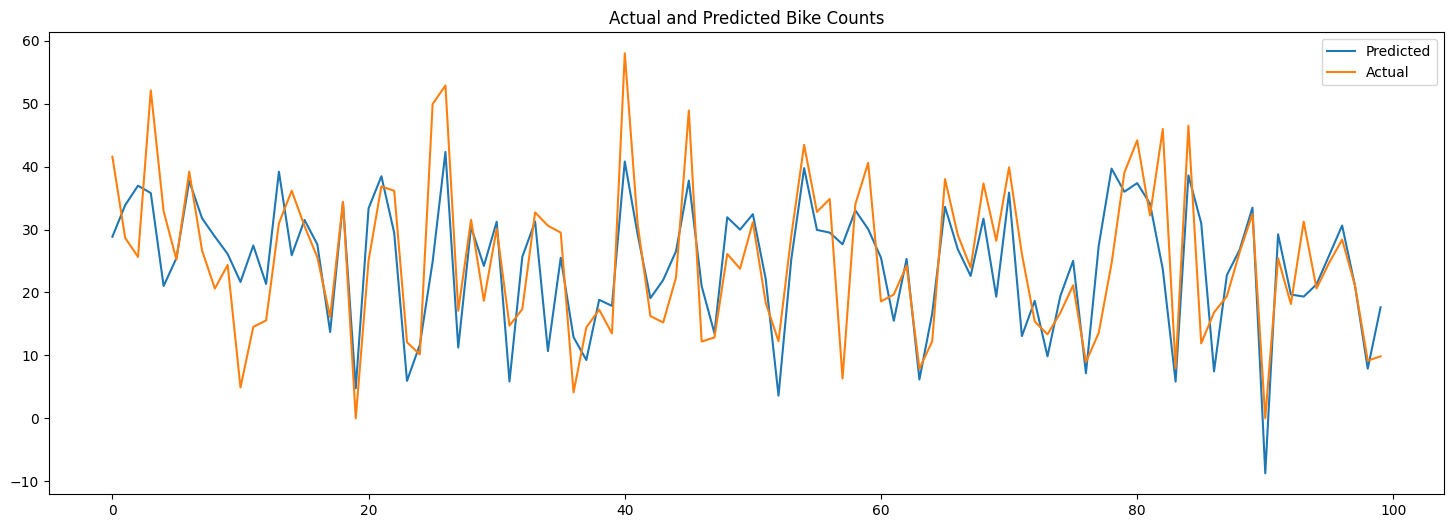

In [71]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((y_pred_test_ridge)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

Text(0, 0.5, 'Predicted')

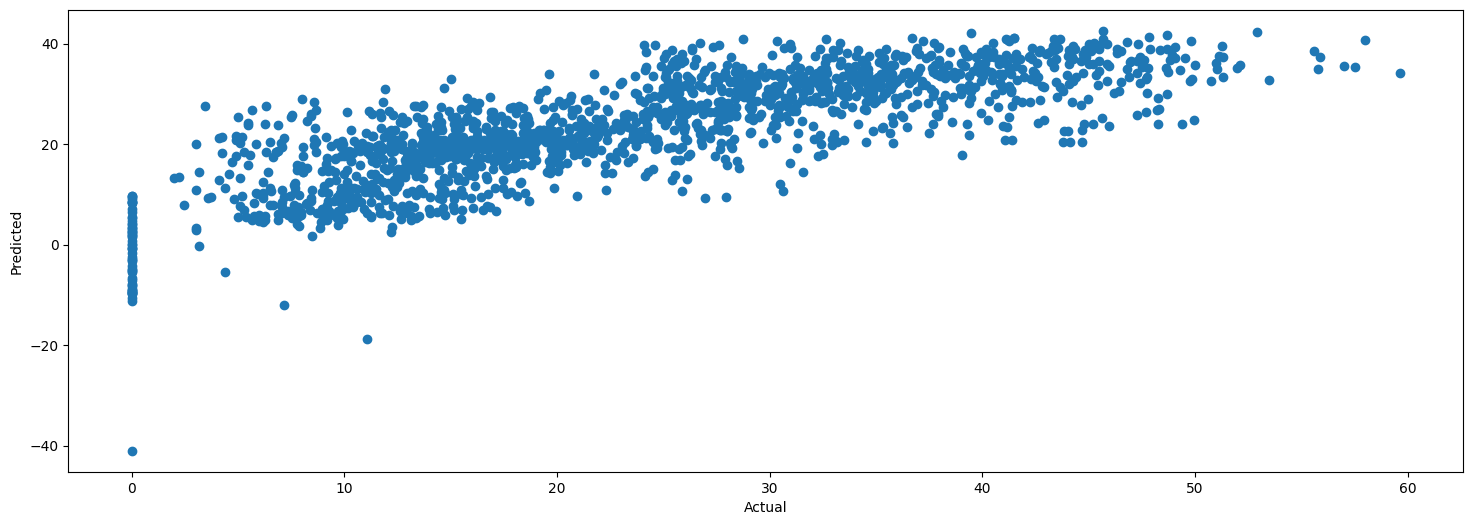

In [72]:
# Plotting the actual vs predicted scatter graph.

plt.figure(figsize=(18,6))
plt.scatter((y_test), (y_pred_test_ridge))
plt.xlabel('Actual')
plt.ylabel('Predicted')

## <b> Lasso Regression </b>

*Lasso regression stands for Least Absolute Shrinkage and Selection Operator. It adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.*

**Limitation of Lasso Regression:** 

*Lasso sometimes struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set). If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data.*

In [73]:
# importing required libraries 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [74]:
# Creating an instance of Lasso Regression implementation

lasso = Lasso(alpha=0.1, max_iter=3000)

In [75]:
# Fitting the Lasso model
lasso.fit(X_train, y_train)

# Model Score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.6106890662436177 0.627613001588454


In [76]:
# Predict for training data

y_pred_train_lasso=lasso.predict(X_train)

# Predict for testing data

y_pred_test_lasso=lasso.predict(X_test)

In [77]:
# Evaluation matrics for TRAIN data
 
MSE_lasso = mean_squared_error((y_train), (y_pred_train_lasso))
MAE_lasso = mean_absolute_error(y_train, y_pred_train_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
r2_lasso = r2_score(y_train, y_pred_train_lasso)
Adjusted_R2_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [78]:
print(f"The Mean Absolute Error (MAE) is {MAE_lasso}.")
print(f"The Mean Squred Error(MSE) is {MSE_lasso}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_lasso}.")
print(f"The R2 Score is {r2_lasso}.")
print(f"Adjusted R2 is {Adjusted_R2_lasso}." )

The Mean Absolute Error (MAE) is 5.846635649590576.
The Mean Squred Error(MSE) is 57.82516918312757.
The Root Mean Squared Error(RMSE) is 7.604286237585193.
The R2 Score is 0.627613001588454.
Adjusted R2 is 0.6241788851765897.


In [79]:
# storing the TRAIN set metrics value in the train evaluation dataframe

dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_R2_lasso ),2)
       }
training_df = training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.612,53.298,7.301,0.657,0.65
1,Ridge regression,5.613,53.298,7.301,0.657,0.65
2,Lasso regression,5.847,57.825,7.604,0.628,0.62


In [80]:
# evaluation metrics for TEST data

MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
RMSE_l=np.sqrt(MSE_l)
r2_l= r2_score((y_test), (y_pred_test_lasso))
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [81]:
print(f"The Mean Absolute Error (MAE) is {MAE_l}.")
print(f"The Mean Squred Error(MSE) is {MSE_l}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_l}.")
print(f"The R2 Score is {r2_l}.")
print(f"Adjusted R2 is {Adjusted_R2_l}." )

The Mean Absolute Error (MAE) is 5.89871983396493.
The Mean Squred Error(MSE) is 59.92141160580649.
The Root Mean Squared Error(RMSE) is 7.740892171178106.
The R2 Score is 0.6106890662436177.
Adjusted R2 is 0.6070988789582563.


In [82]:
# storing the TEST set metrics value in the test evaluation dataframe

dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.692,56.054,7.487,0.636,0.63
1,Ridge regression,5.692,56.024,7.485,0.636,0.63
2,Lasso regression,5.899,59.921,7.741,0.611,0.61


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

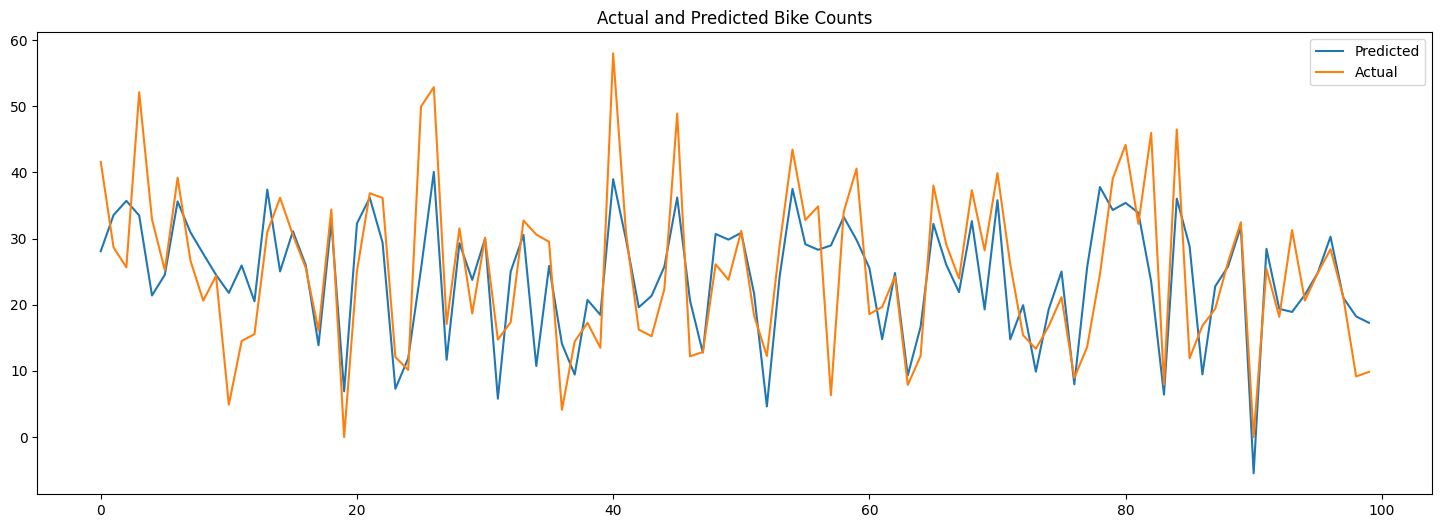

In [83]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((y_pred_test_lasso)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

Text(0, 0.5, 'Predicted')

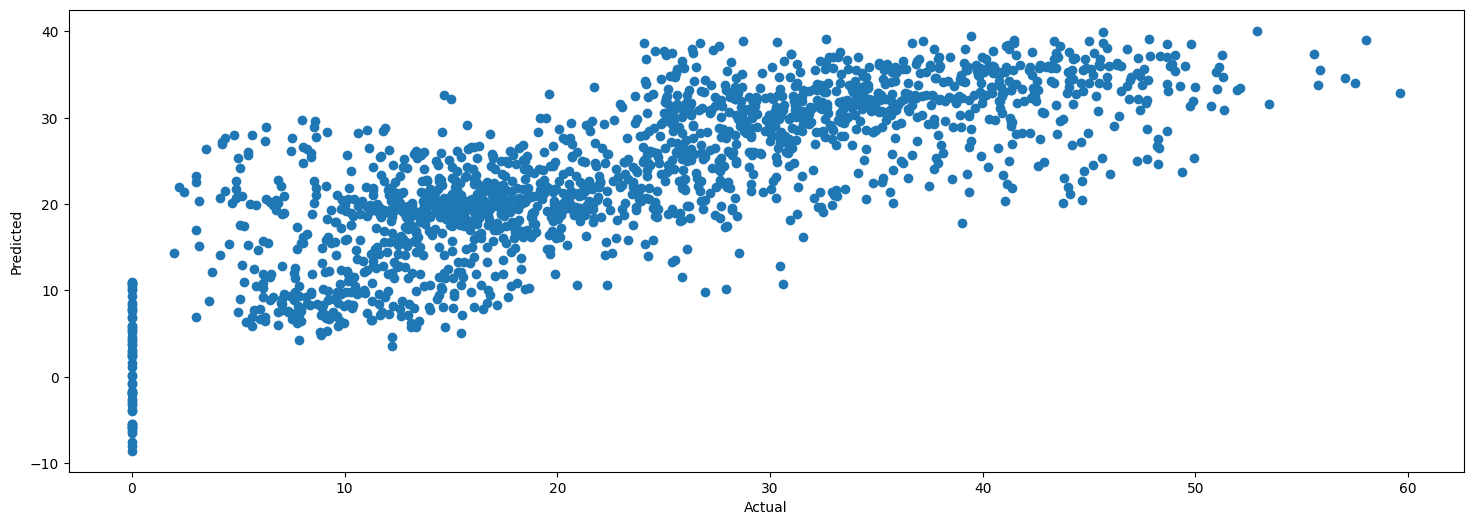

In [84]:
# Plotting the actual vs predicted scatter graph.

plt.figure(figsize=(18,6))
plt.scatter((y_test), (y_pred_test_lasso))
plt.xlabel('Actual')
plt.ylabel('Predicted')

## **Elastic Net Regression**

*Sometimes, the lasso regression can cause a small bias in the model where the prediction is too dependent upon a particular variable. In these cases, elastic Net is proved to better it combines the regularization of both lasso and Ridge. The advantage of that it does not easily eliminate the high collinearity coefficient.*



In [85]:
# Necessary library

from sklearn.linear_model import ElasticNet

# creating a model object.

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [86]:
# Fitting the model

elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [87]:
# checking the score

elasticnet.score(X_train, y_train)

0.5103312041383434

In [88]:
# predict on train data
y_pred_train_en=elasticnet.predict(X_train)

# predict on test data
y_pred_test_en=elasticnet.predict(X_test)

In [89]:
# Evaluation matrics for TRAIN data

MSE_e= mean_squared_error((y_train), (y_pred_train_en))
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
RMSE_e=np.sqrt(MSE_e)
r2_e= r2_score(y_train, y_pred_train_en)
Adjusted_R2_e = (1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [90]:
print(f"The Mean Absolute Error (MAE) is {MAE_e}.")
print(f"The Mean Squred Error(MSE) is {MSE_e}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_e}.")
print(f"The R2 Score is {r2_e}.")
print(f"Adjusted R2 is {Adjusted_R2_e}." )

The Mean Absolute Error (MAE) is 6.8162967351724815.
The Mean Squred Error(MSE) is 76.03697520369907.
The Root Mean Squared Error(RMSE) is 8.719918302581686.
The R2 Score is 0.5103312041383434.
Adjusted R2 is 0.5058155264819824.


In [91]:
# storing the TRAIN set metrics value into the train evaluation dataframe

dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.612,53.298,7.301,0.657,0.65
1,Ridge regression,5.613,53.298,7.301,0.657,0.65
2,Lasso regression,5.847,57.825,7.604,0.628,0.62
3,Elastic net regression,6.816,76.037,8.720,0.510,0.51


In [92]:
# Evaluation matrics for TEST data

MSE_e= mean_squared_error(y_test, y_pred_test_en)
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
RMSE_e=np.sqrt(MSE_e)
r2_e= r2_score((y_test), (y_pred_test_en))
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [93]:
print(f"The Mean Absolute Error (MAE) is {MAE_e}.")
print(f"The Mean Squred Error(MSE) is {MSE_e}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_e}.")
print(f"The R2 Score is {r2_e}.")
print(f"Adjusted R2 is {Adjusted_R2_e}." )

The Mean Absolute Error (MAE) is 6.821335412777837.
The Mean Squred Error(MSE) is 77.2267572432974.
The Root Mean Squared Error(RMSE) is 8.787875581919524.
The R2 Score is 0.4982557959223345.
Adjusted R2 is 0.49362876003458656.


In [94]:
# storing the TEST set metrics value into the test evaluation dataframe

dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.692,56.054,7.487,0.636,0.63
1,Ridge regression,5.692,56.024,7.485,0.636,0.63
2,Lasso regression,5.899,59.921,7.741,0.611,0.61
3,Elastic net regression Test,6.821,77.227,8.788,0.498,0.49


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

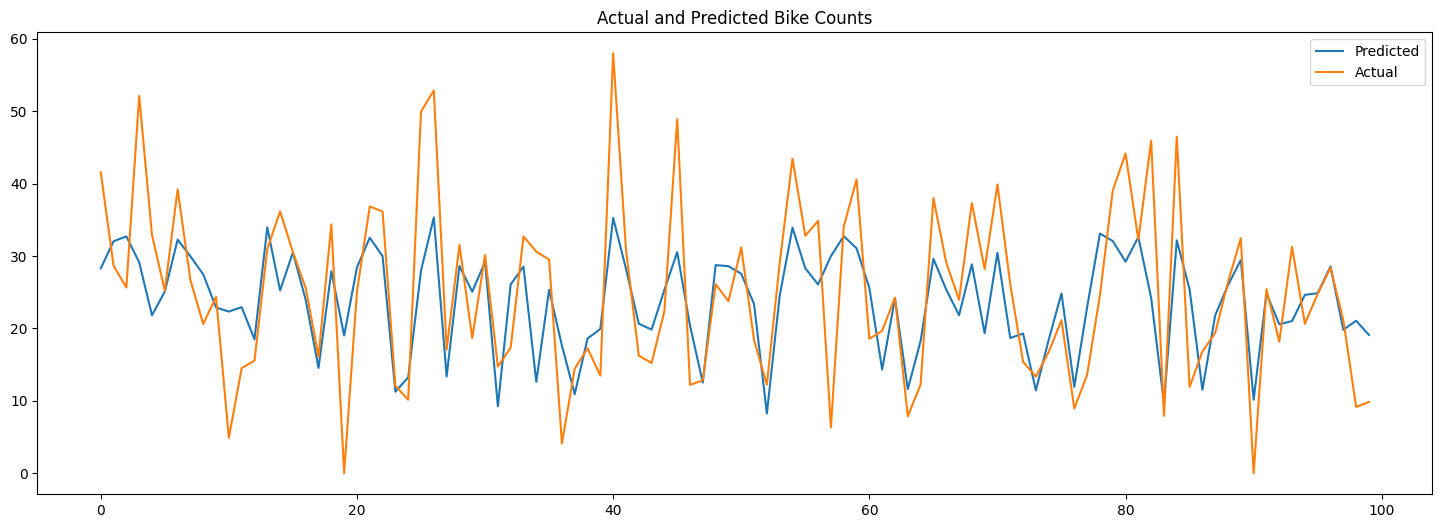

In [95]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((y_pred_test_en)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

Text(0, 0.5, 'Predicted')

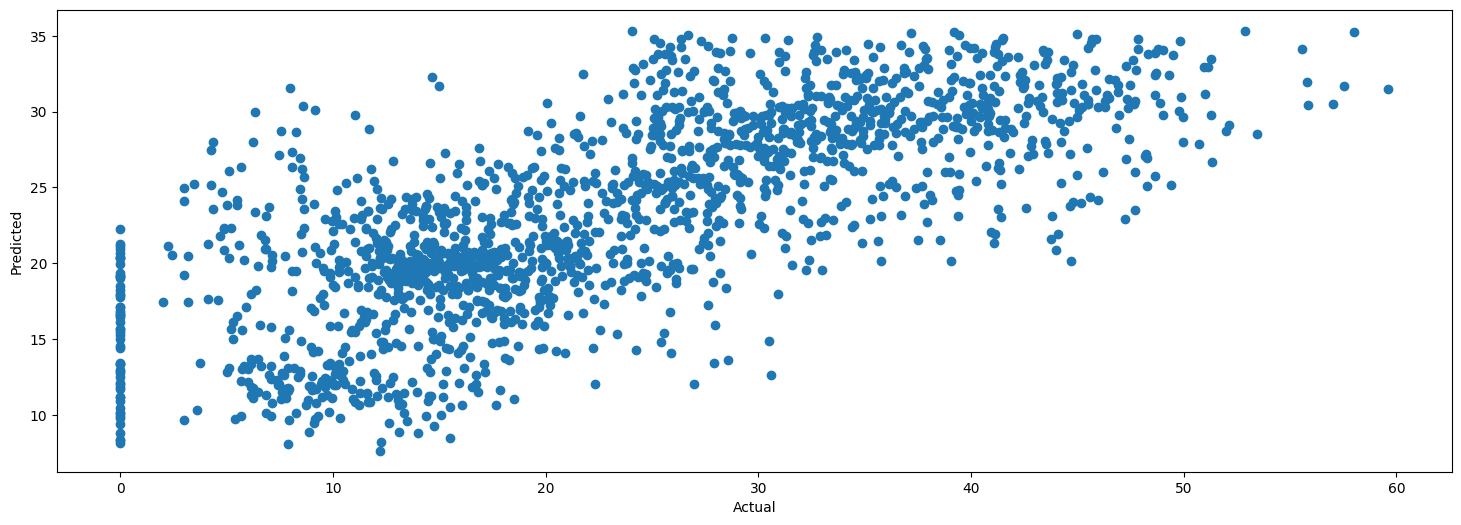

In [96]:
# Plotting the actual vs predicted scatter graph.

plt.figure(figsize=(18,6))
plt.scatter((y_test), (y_pred_test_en))
plt.xlabel('Actual')
plt.ylabel('Predicted')

# **Optimization**

*Here, we have used Optimization technique in our Decision Tree, Random forest, Xgboost regressor, and gradient boost regressor to improve the accuracy.*

*But before diving into that we need to understand what hyperparameters are.*

**Hyperparameters** *are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms.*

*Now we know what hyperparameters are, our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. To achieve that we'll use Grid Search CV that will help us find best hyperparameters values for our models.*

**Grid Search** *uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.*

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. As we know that before training the model with data, we divide the data into two parts – train data and test data. In cross-validation, the process divides the train data further into two parts – the train data and the validation data.

## <b> Decision Tree  

*Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.*

*Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.*

**In a Decision Tree diagram, we have:**

**Root Node:** *The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.*

**Splitting:** *It is a process of dividing a node into two or more sub-nodes.*

**Decision Node:** *This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.*

**Leaf:** *Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.*

In [97]:
# Importing important libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [98]:
# Fit the classifier with default hyper-parameters

decisiontree = DecisionTreeRegressor(random_state=1)

In [99]:
# list of parameters

max_depth = [6, 8, 10]
min_sample_split = [50, 100, 150]
min_sample_leaf = [40, 50]

In [100]:
# Hyperparameter Grid

grid = {'max_depth' : max_depth,
         'min_samples_split' : min_sample_split,
         'min_samples_leaf' : min_sample_leaf}

In [101]:
# GridSearchCV to find best parameters

dt = GridSearchCV(decisiontree, grid, scoring='r2', cv=5)
dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='r2')

In [102]:
#Checking the best parameters of the model.
dt.best_params_

{'max_depth': 10, 'min_samples_leaf': 40, 'min_samples_split': 50}

In [103]:
# predict for train data
y_pred_train_d = dt.predict(X_train)

# predict for test data
y_pred_test_d = dt.predict(X_test)

In [104]:
# Evaluation metrics for TRAIN data

MSE_d= mean_squared_error(y_train, y_pred_train_d)
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
RMSE_d=np.sqrt(MSE_d)
r2_d= r2_score(y_train, y_pred_train_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [105]:
print(f"The Mean Absolute Error (MAE) is {MAE_d}.")
print(f"The Mean Squred Error(MSE) is {MSE_d}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_d}.")
print(f"The R2 Score is {r2_d}.")
print(f"Adjusted R2 is {Adjusted_R2_d}." )

The Mean Absolute Error (MAE) is 3.3370961650783624.
The Mean Squred Error(MSE) is 23.27095746847265.
The Root Mean Squared Error(RMSE) is 4.823998079236003.
The R2 Score is 0.8501378876315365.
Adjusted R2 is 0.8487558739151703.


In [106]:
# storing the train set metrics value into the train evaluation dataframe
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.612,53.298,7.301,0.657,0.65
1,Ridge regression,5.613,53.298,7.301,0.657,0.65
2,Lasso regression,5.847,57.825,7.604,0.628,0.62
3,Elastic net regression,6.816,76.037,8.720,0.510,0.51
4,Decision tree regression,3.337,23.271,4.824,0.850,0.85


In [107]:
# Evaluation metrics for TEST data

MSE  = mean_squared_error(y_test, y_pred_test_d)
MAE = mean_absolute_error(y_test, y_pred_test_d)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred_test_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [108]:
print(f"The Mean Absolute Error (MAE) is {MAE}.")
print(f"The Mean Squred Error(MSE) is {MSE}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")
print(f"The R2 Score is {r2}.")
print(f"Adjusted R2 is {Adjusted_R2_d}." )

The Mean Absolute Error (MAE) is 3.5788850227719426.
The Mean Squred Error(MSE) is 27.384639560718416.
The Root Mean Squared Error(RMSE) is 5.233033495088525.
The R2 Score is 0.8220813009529941.
Adjusted R2 is 0.8204405521433388.


In [109]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2_score':round((r2),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.692,56.054,7.487,0.636,0.63
1,Ridge regression,5.692,56.024,7.485,0.636,0.63
2,Lasso regression,5.899,59.921,7.741,0.611,0.61
3,Elastic net regression Test,6.821,77.227,8.788,0.498,0.49
4,Decision tree regression,3.579,27.385,5.233,0.822,0.82


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

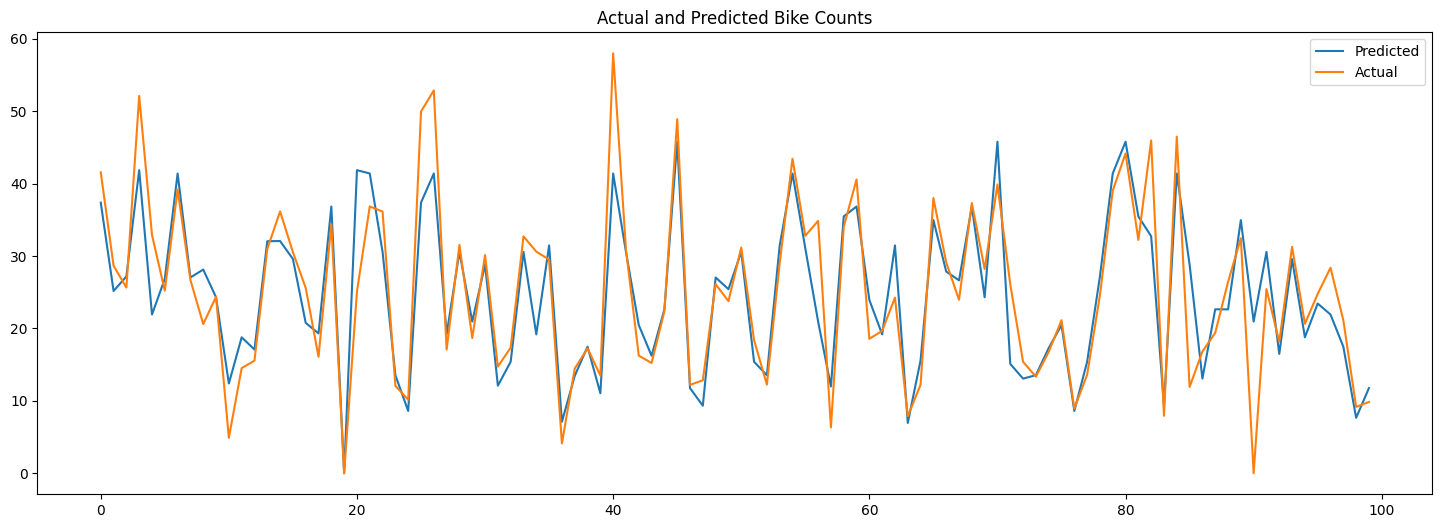

In [110]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((y_pred_test_d)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

Text(0, 0.5, 'Predicted')

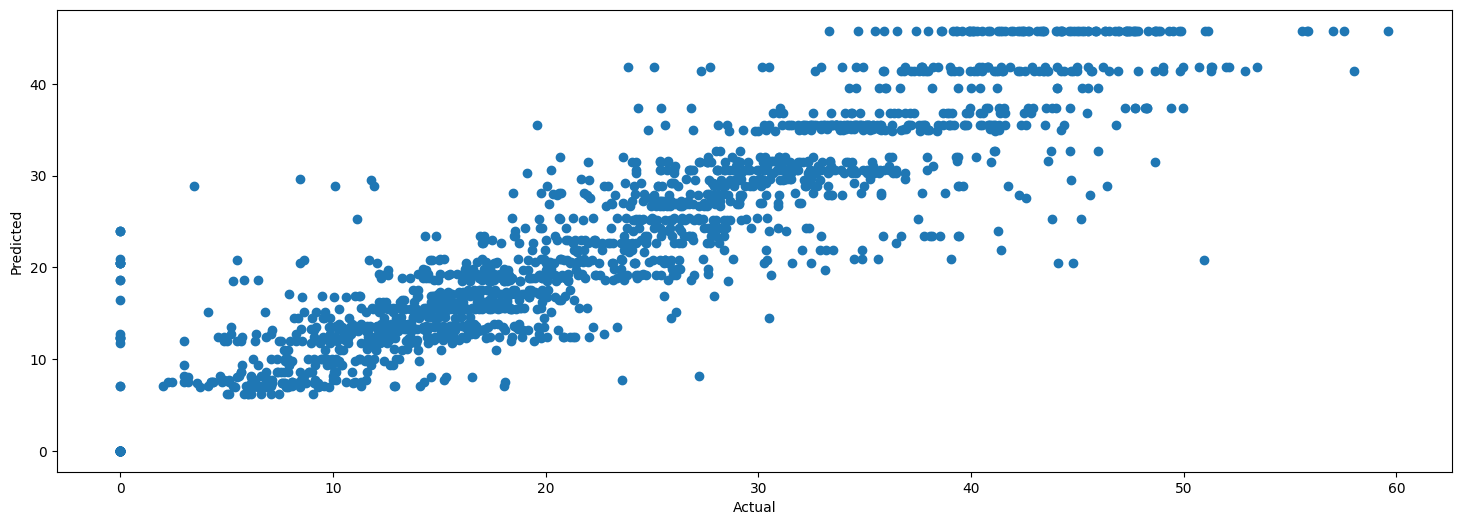

In [111]:
# Plotting the actual vs predicted scatter graph.

plt.figure(figsize=(18,6))
plt.scatter((y_test), (y_pred_test_d))
plt.xlabel('Actual')
plt.ylabel('Predicted')

## <b> Random Forest </b>

*Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.*

*As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.*

*Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.*

In [136]:
from sklearn import model_selection


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rfc = RandomForestClassifier()


In [147]:
# Importing important library

from sklearn.ensemble import RandomForestRegressor 

In [138]:
#Creating an instance for the random forest regressor.
rf = RandomForestRegressor()

In [129]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters 
# and their values the grid search algorithm will apply and get the 
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {'n_estimators': [200, 500],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth' : [5,6,7,8,9,10,11],}

In [130]:
# GridSearchCV to find best parameters

from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator = rf, param_grid = param_grid_cv, cv = 5)


In [ ]:
# Fitting the training data into the model.

CV_rfc.fit(X_train, y_train)

In [ ]:
# Best set of parametes

CV_rfc.best_params_

{'max_depth': 11, 'max_features': 'auto', 'n_estimators': 500}

In [ ]:
# predict on train data.
y_pred_train_grid_cvr = CV_rfc.predict(X_train)

# predict on test data.
y_pred_test_grid_cvr = CV_rfc.predict(X_test)

In [ ]:
# calculating model score on train data

print("Model Score:",CV_rfc.score(X_train,y_train))

Model Score: 0.9463338320272251


In [ ]:
# Evaluation metrics for TRAIN data

MSE_rf = mean_squared_error(y_train, y_pred_train_grid_cvr)
MAE_rf= mean_absolute_error(y_train, y_pred_train_grid_cvr)
RMSE_rf=np.sqrt(MSE_rf)
r2_rf= r2_score(y_train, y_pred_train_grid_cvr)
Adjusted_R2_rf = (1-(1-r2_score(y_train, y_pred_train_grid_cvr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_rf}.")
print(f"The R2 Score is {r2_rf}.")
print(f"Adjusted R2 is {Adjusted_R2_rf}." )

The Mean Absolute Error (MAE) is 2.0021436640152945.
The Mean Squred Error(MSE) is 8.333414581263838.
The Root Mean Squared Error(RMSE) is 2.8867654184681926.
The R2 Score is 0.9463338320272251.
Adjusted R2 is 0.9458389278845367.


In [ ]:
# Storing metrics in a dictionary.
dict1={'Model':'Random forest regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}

# adding the values to the train evaluation dataframe.

training_df=training_df.append(dict1,ignore_index=True)
training_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.612,53.298,7.301,0.657,0.65
1,Ridge regression,5.613,53.298,7.301,0.657,0.65
2,Lasso regression,5.847,57.825,7.604,0.628,0.62
3,Elastic net regression,6.816,76.037,8.720,0.510,0.51
4,Decision tree regression,3.337,23.271,4.824,0.850,0.85
5,Random forest regression,2.002,8.333,2.887,0.946,0.95


In [ ]:
# Evaluation metrics for TEST data

MSE_rf= mean_squared_error(y_test, y_pred_test_grid_cvr)
MAE_rf= mean_absolute_error(y_test, y_pred_test_grid_cvr)
RMSE_rf=np.sqrt(MSE_rf)
r2_rf= r2_score((y_test), (y_pred_test_grid_cvr))
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_grid_cvr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

In [ ]:
print(f"The Mean Absolute Error (MAE) is {MAE_rf}.")
print(f"The Mean Squred Error(MSE) is {MSE_rf}.")
print(f"The Root Mean Squared Error(RMSE) is {RMSE_rf}.")
print(f"The R2 Score is {r2_rf}.")
print(f"Adjusted R2 is {Adjusted_R2_rf}." )

The Mean Absolute Error (MAE) is 2.7446999065186866.
The Mean Squred Error(MSE) is 16.213952370555717.
The Root Mean Squared Error(RMSE) is 4.026655233634451.
The R2 Score is 0.894657539465394.
Adjusted R2 is 0.8936860816160834.


In [ ]:
# storing the test set metrics value into the test evaluation dataframe
dict2={'Model':'Random forest regression',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)
test_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted R2
0,Linear regression,5.692,56.054,7.487,0.636,0.63
1,Ridge regression,5.692,56.024,7.485,0.636,0.63
2,Lasso regression,5.899,59.921,7.741,0.611,0.61
3,Elastic net regression Test,6.821,77.227,8.788,0.498,0.49
4,Decision tree regression,3.579,27.385,5.233,0.822,0.82
5,Random forest regression,2.745,16.214,4.027,0.895,0.89


Text(0.5, 1.0, 'Actual and Predicted Bike Counts')

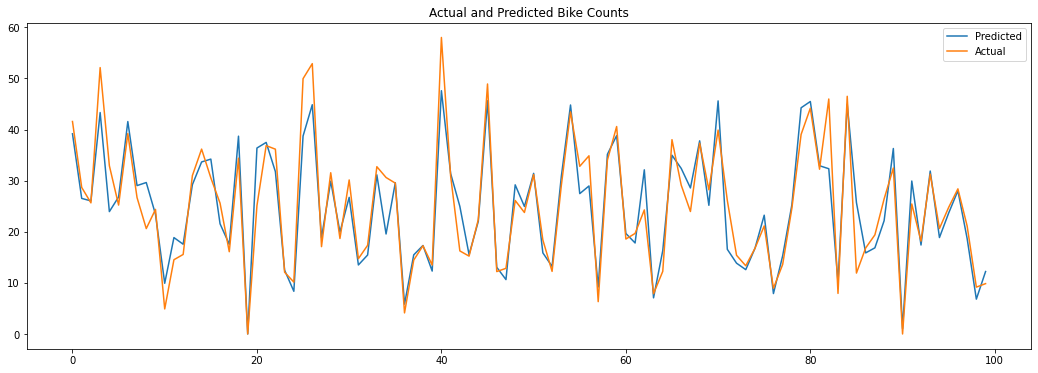

In [ ]:
# Plotting the actual vs predicted line graph.

plt.figure(figsize=(18,6))
plt.plot((y_pred_test_grid_cvr)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Bike Counts')

Text(0, 0.5, 'Predicted')

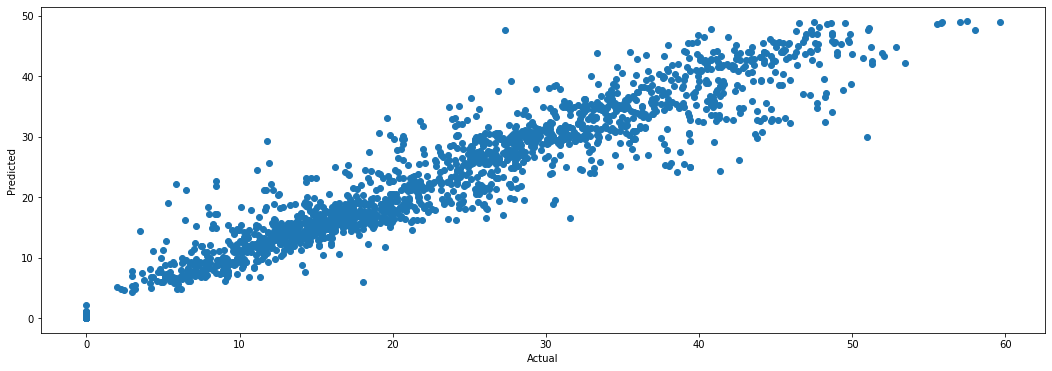

In [ ]:
# Plotting the actual vs predicted scatter graph.

plt.figure(figsize=(18,6))
plt.scatter((y_test), (y_pred_test_grid_cvr))
plt.xlabel('Actual')
plt.ylabel('Predicted')